# Выпускная квалификационная работа по курсу «Data Science»



Структурно ВКР состоит из двух частей -- аналитической и практической:

1. ***Аналитическая часть.***

  1.1. Постановка задачи.<br>
  1.2. Описание используемых методов.<br>
  1.3. Разведочный анализ данных.
  
  
2. ***Практическая часть.***

  2.1. Предобработка данных. Удаление шумов, нормализация и т.д.<br>
  2.2. Разработка и обучение модели. Графики распределения для каждого признака до и после нормализации, их максимальные и минимальные значения).<br>
  2.3. Тестирование модели. Ошибка каждой модели на тренировочной и тестирующей части выборки. Обосновывание выбора модели.<br>
  2.4. Реализация нейронной сети, рекомендующей соотношение матрица-наполнитель.<br>
  2.5. Разработка приложения. Его функционал приложения и краткая инструкция использования.<br>
  2.6. Создание удаленного репозитория и загрузка результатов работы на него.

## 1.1. Постановка задачи

Имеется следующая информация по теоретическим основам поставленной задачи:

> Тема: **Прогнозирование конечных свойств новых материалов (композиционных материалов).**
> 
> **Описание:** 
> Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. Яркий пример композита - железобетон. Бетон прекрасно сопротивляется сжатию, но плохо растяжению. Стальная арматура внутри бетона компенсирует его неспособность сопротивляться сжатию, формируя тем самым новые, уникальные свойства. Современные композиты изготавливаются из других материалов: полимеры, керамика, стеклянные и углеродные волокна, но данный принцип сохраняется. У такого подхода есть и недостаток: даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента).
>
>**Актуальность:** Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.


## 1.2. Описание используемых методов.

Построение моделей машинного обучения для прогноза модуля упругости при растяжении и прочности при растяжении является эффективным и быстрым способом прогнозирования свойств материалов. Эти модели используются для анализа больших объемов данных и выявления закономерностей в поведении материалов.

Для прогнозирования модуля упругости и прочности при растяжении, модели машинного обучения используют различные алгоритмы, такие как регрессия, случайный лес, градиентный бустинг и нейронные сети. Эти алгоритмы позволяют выявлять связи между различными свойствами материалов и прогнозировать их поведение в различных условиях.

## 1.3. Разведочный анализ предложенных данных

В этом разделе необходимо:
* нарисовать гистограммы распределения каждой из переменной; 
* диаграммы ящика с усами;
* попарные графики рассеяния точек;
* для каждой колонки получить среднее, медианное значение;
* провести анализ и исключение выбросов;
* проверить наличие пропусков.

> Имеется датасет со свойствами композита. Рассматривается базальтопластик с нашивками из углепластика.
>
> На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). 
>
> На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов.
>
> Датасет состоит из двух файлов - X_bp (составляющая из базальтопластика) и Х_nup (составляющая из углепластика). По условиям задачи необходимо сделать объединение  файлов по индексу тип объединения INNER.

In [1]:
# Подключаем доступ к файлам данных для гугл драйв
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Пути для гугл драйв
nb_path = '/content/drive/MyDrive/Colab Notebooks/'
data_path = '/content/drive/MyDrive/Colab Notebooks/data/'
img_path = '/content/drive/MyDrive/Colab Notebooks/img/'
models_path = '/content/drive/MyDrive/Colab Notebooks/models/'

In [3]:
# # Пути для локального запуска
# nb_path = ''
# data_path = '../data/'
# models_path = '../models/'

In [4]:
# Импортирем необходимые библиотеки

import numpy as np                                     # Библиотека для работы с массивами
import pandas as pd                                    # Библиотека для работы с таблицами
import matplotlib.pyplot as plt                        # Библиотека для визуализации данных
import seaborn as sns                                  # Библиотека для визуализации данных
from sklearn.preprocessing import OrdinalEncoder       # Кодирование категориальных переменных
from sklearn.preprocessing import StandardScaler       # Стандартизация числовых переменных
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer          # Объединение преобразований для признаков
from sklearn.model_selection import train_test_split   # Разбиение данных на тренировочный и тестовый наборы
from sklearn.model_selection import KFold              # Кросс-валидация
from sklearn.model_selection import cross_val_score    # Кросс-валидация
from sklearn.model_selection import cross_validate     # Кросс-валидация
from sklearn.model_selection import GridSearchCV       # Подбор параметров модели
from sklearn.base import BaseEstimator                 # Базовый класс для создания пользовательских оценок
from sklearn.dummy import DummyRegressor               # Базовая модель регрессии
from sklearn.linear_model import LinearRegression      # Линейная регрессия
from sklearn.linear_model import Ridge                 # Ридж-регрессия
from sklearn.linear_model import Lasso                 # Лассо-регрессия
from sklearn.svm import SVR                            # Метод опорных векторов
from sklearn.neighbors import KNeighborsRegressor      # Метод ближайших соседей
from sklearn.tree import DecisionTreeRegressor         # Дерево решений
from sklearn.ensemble import RandomForestRegressor     # Случайный лес
from sklearn.ensemble import GradientBoostingRegressor # Градиентный бустинг
from sklearn import metrics                            # Метрики для оценки качества моделей
import pickle                                          # Библиотека для сохранения и загрузки моделей
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPRegressor

In [5]:
# Импорт библиотеки TensorFlow
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.12.0


In [6]:
# Загрузим исходные данные из файлов X_bp и X_nup, проверим их размерность
X_bp = pd.read_excel(data_path + 'X_bp.xlsx', index_col=0)
X_nup = pd.read_excel(data_path + 'X_nup.xlsx', index_col=0)
print(f"X_bp содержит {X_bp.shape[1]} признаков и {X_bp.shape[0]} строк.")
print(f"X_nup содержит {X_nup.shape[1]} признака и {X_nup.shape[0]} строк.")

X_bp содержит 10 признаков и 1023 строк.
X_nup содержит 3 признака и 1040 строк.


Рассмотрим признаки датасетов

In [7]:
pd.DataFrame(X_bp.columns, columns=['X_bp признаки'])

X_bp признаки
0       Соотношение матрица-наполнитель
1                      Плотность, кг/м3
2                 модуль упругости, ГПа
3           Количество отвердителя, м.%
4       Содержание эпоксидных групп,%_2
5              Температура вспышки, С_2
6         Поверхностная плотность, г/м2
7  Модуль упругости при растяжении, ГПа
8         Прочность при растяжении, МПа
9               Потребление смолы, г/м2

In [8]:
pd.DataFrame(X_nup.columns, columns=['X_nup признаки'])

X_nup признаки
0  Угол нашивки, град
1         Шаг нашивки
2   Плотность нашивки

По условиям датасеты необходимо объединить типом INNER. В результирующий датасет не попадут 17 строк X_nup.

In [9]:
# Объединяю датасеты
df = X_bp.join(X_nup, how='inner')
print(f"Объединенный датасет содержит {df.shape[1]} признаков и {df.shape[0]} строк.")

Объединенный датасет содержит 13 признаков и 1023 строк.


In [10]:
# Сохраним объединенные данные в csv
df.to_csv(data_path + 'df_merged.csv', sep=',', encoding='utf-8')

In [11]:
# Посмотрим типы данных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Все признаки имеют тип float64 (нет типа "object") - значит, в столбцах содержатся только числа.

In [12]:
# Проверим на пропуски
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропусков нет.

Поскольку датасет подготовлен, отсутствие пропусков и значений ошибочных типов не удивляет.

In [13]:
# Количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [14]:
# Посмотрим описательную статистику
df_descr = df.describe().T
df_descr['median'] = df.median()
df_descr.style.format(precision=4)

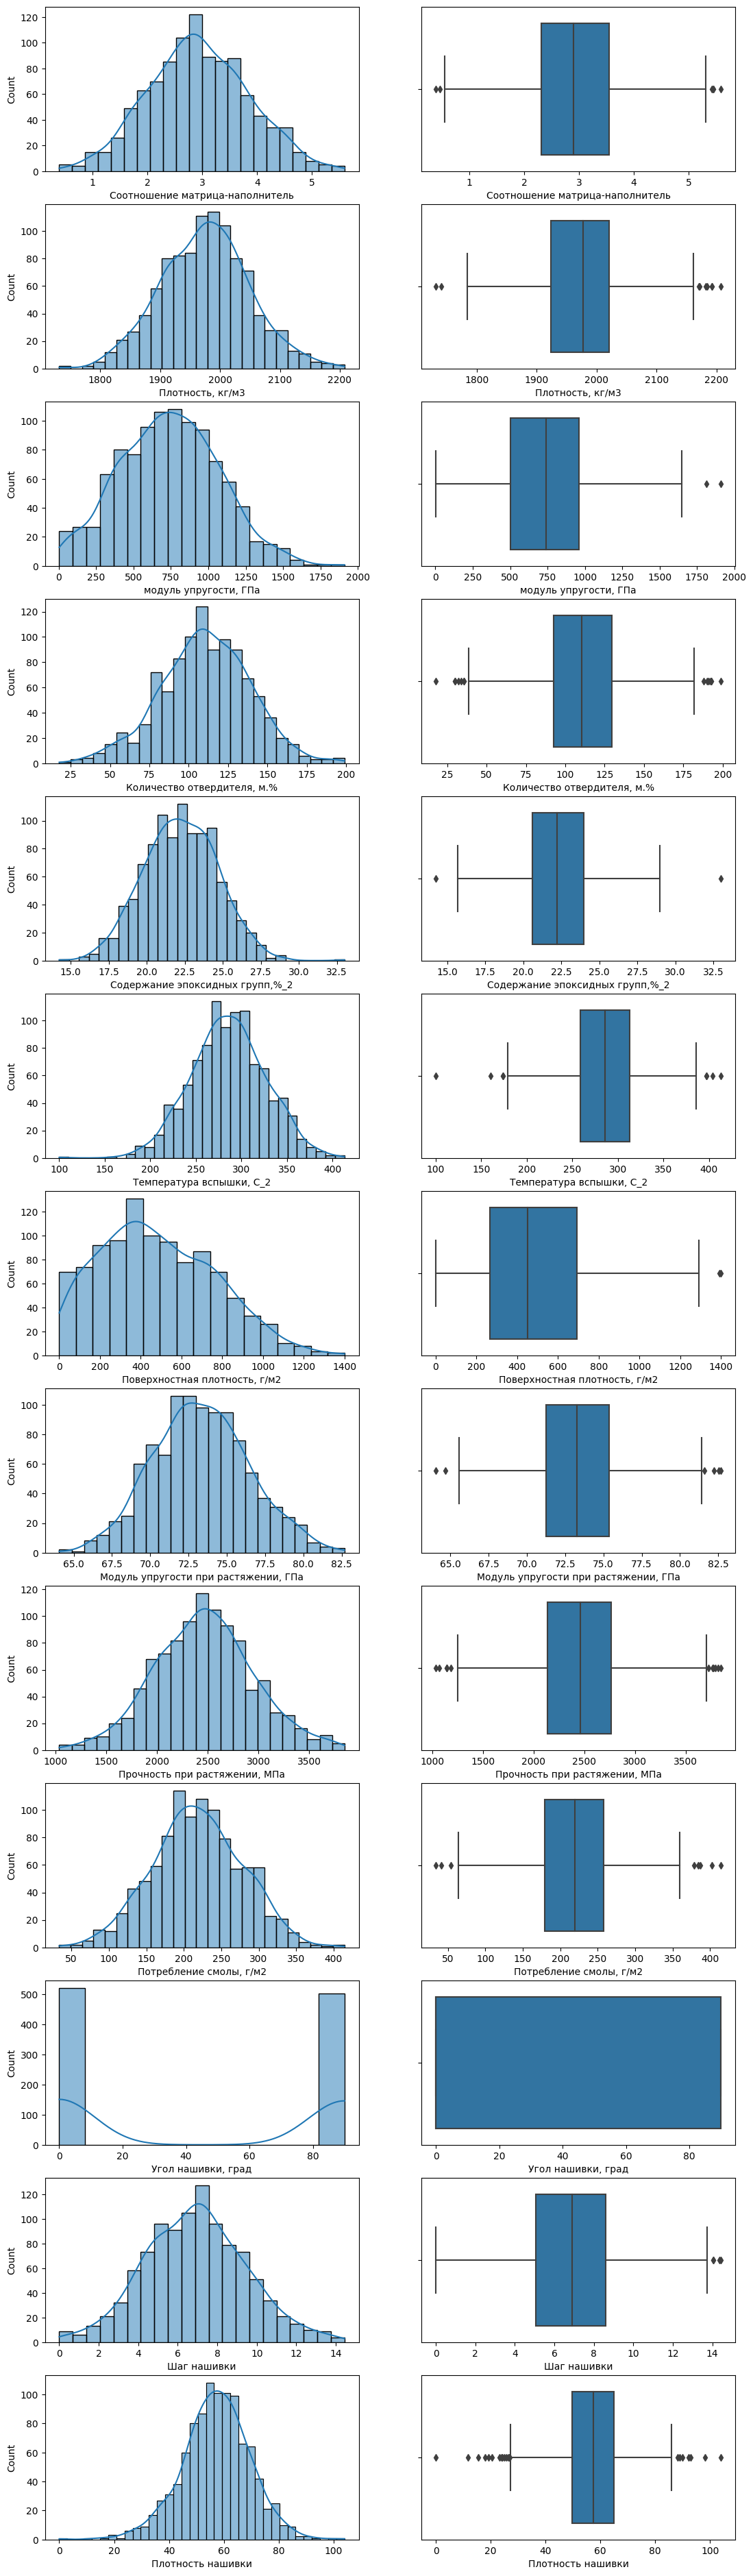

In [15]:
# Построим гистограммы распределения переменных и диаграммы ящика с усами
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение. Они количественные, вещественные. Принимают неотрицательные значения. Соответственно, нормализация признаков перед обучением моделлей не понадобится.

На ящиках с усами видно выбросы.

In [16]:
# Угол нашивки имеет два значения
df['Угол нашивки, град'].unique()

array([ 0, 90])

In [17]:
df['Угол нашивки, град'].value_counts()

0     520
90    503
Name: Угол нашивки, град, dtype: int64

Частота обоих значений примерно одинакова, поэтому позже закодируем его  

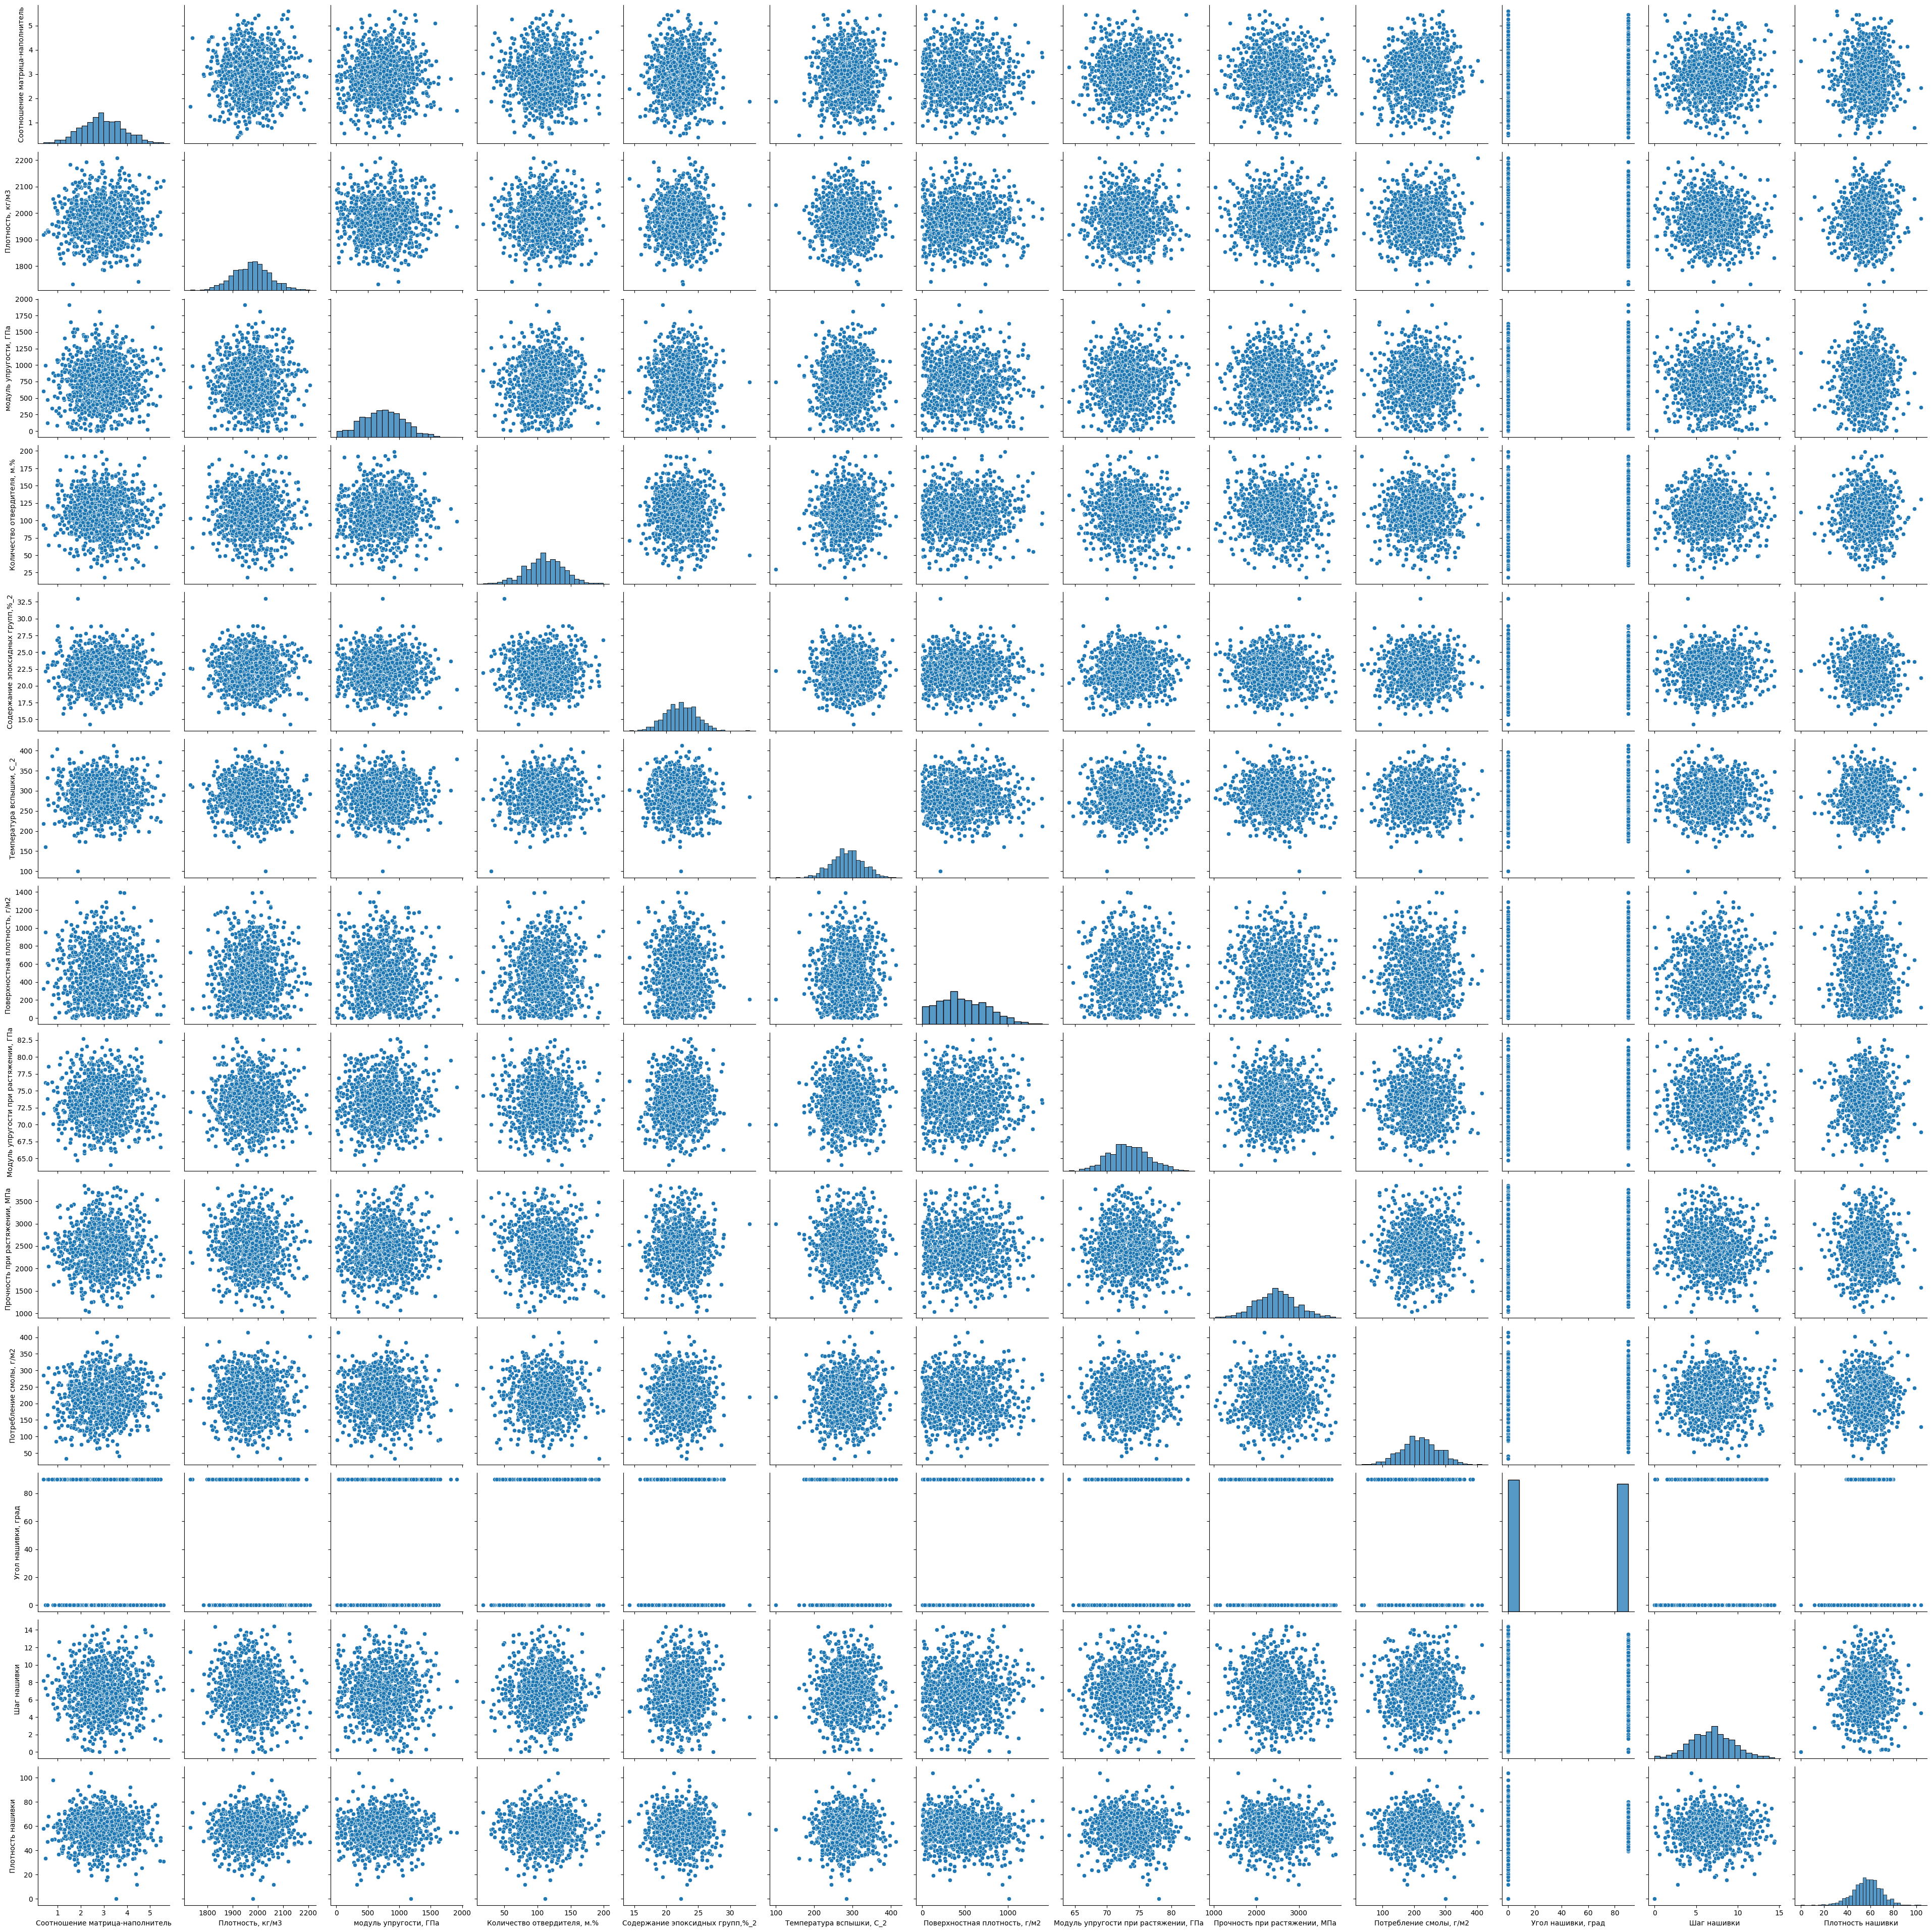

In [18]:
# Построим попарные графики рассеяния точек
sns.pairplot(df, height=3);

По графикам видно, что в датасете есть выбросы: некоторые точки стоят очень далеко от общего облака.
Далее избавимся от них.

## 2.1. Предобработка данных

Предобработка данных - это процесс подготовки и очистки датасета перед использованием его в алгоритмах машинного обучения. Этот процесс включает в себя несколько шагов:
На данном этапе мы избавимся от выбросов.
Выбросы могут исказить результаты машинного обучения, поэтому необходимо их идентифицировать и обработать. Это может включать в себя удаление выбросов или замену их средними или медианными значениями.

Существует несколько методов поиска выбросов в датасете:

1. Метод межквартильного расстояния (IQR) — основан на медиане и квартилях распределения признака. Выбросами считаются значения, лежащие за пределами интервала $[Q_1 - k \cdot IQR, Q_3 + k \cdot IQR]$, где $Q_1$ и $Q_3$ — первый и третий квартили распределения, $IQR = Q_3 - Q_1$ — межквартильный размах, а $k$ — коэффициент, определяющий ширину интервала.


2. Метод стандартных отклонений — основан на стандартном отклонении распределения признака. Выбросами считаются значения, лежащие за пределами интервала $[\mu - k \cdot \sigma, \mu + k \cdot \sigma]$, где $\mu$ и $\sigma$ — среднее и стандартное отклонение распределения, а $k$ — коэффициент, определяющий ширину интервала.


3. Метод DBSCAN — основан на кластеризации точек в пространстве признаков. Выбросами считаются точки, не попадающие ни в один кластер или попадающие в кластер с малым числом точек.


4. Метод Isolation Forest — основан на анализе аномалий в дереве решений. Выбросами считаются точки, которые оказываются на отдельных ветвях дерева.


5. Метод Local Outlier Factor — основан на локальной плотности точек в пространстве признаков. Выбросами считаются точки, которые находятся в области с малой локальной плотностью.

Выбор метода зависит от конкретной задачи и свойств датасета. 

In [19]:
# Воспользуемся методом межквартильного расстояния

# Определение границ выбросов
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Отбрасывание выбросов
filtered = df[(df >= lower_bound) & (df <= upper_bound)].dropna()

filtered.shape


(1022, 13)

In [20]:
# Проверим результат метода стандартных отклонений

means = df.mean(axis=0)
stds = df.std(axis=0)
    
# определяем границы для каждого признака
lower_bounds = means - 3 * stds
upper_bounds = means + 3 * stds
    
# удаляем строки, в которых значения признаков выходят за границы
mask = np.all((df >= lower_bounds) & (df <= upper_bounds), axis=1)
cleaned_df = df[mask]
cleaned_df.shape

(1000, 13)

Видим, что метод межквартильного расстояния оставил нам больше данных. Его и возьмем.

In [21]:
# Сохраним очищенные данные в csv
filtered.to_csv(data_path + 'df_filtered.csv', sep=',', encoding='utf-8')
df = filtered

In [22]:
corr_matrix = df.corr()

# вывод матрицы корреляции
print(corr_matrix)

                                      Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.003805   
модуль упругости, ГПа                                        0.030867   
Количество отвердителя, м.%                                 -0.006476   
Содержание эпоксидных групп,%_2                              0.019764   
Температура вспышки, С_2                                    -0.004757   
Поверхностная плотность, г/м2                               -0.007496   
Модуль упругости при растяжении, ГПа                        -0.009390   
Прочность при растяжении, МПа                                0.024785   
Потребление смолы, г/м2                                      0.071730   
Угол нашивки, град                                          -0.030459   
Шаг нашивки                                                  0.038319   
Плотность нашивки                                  

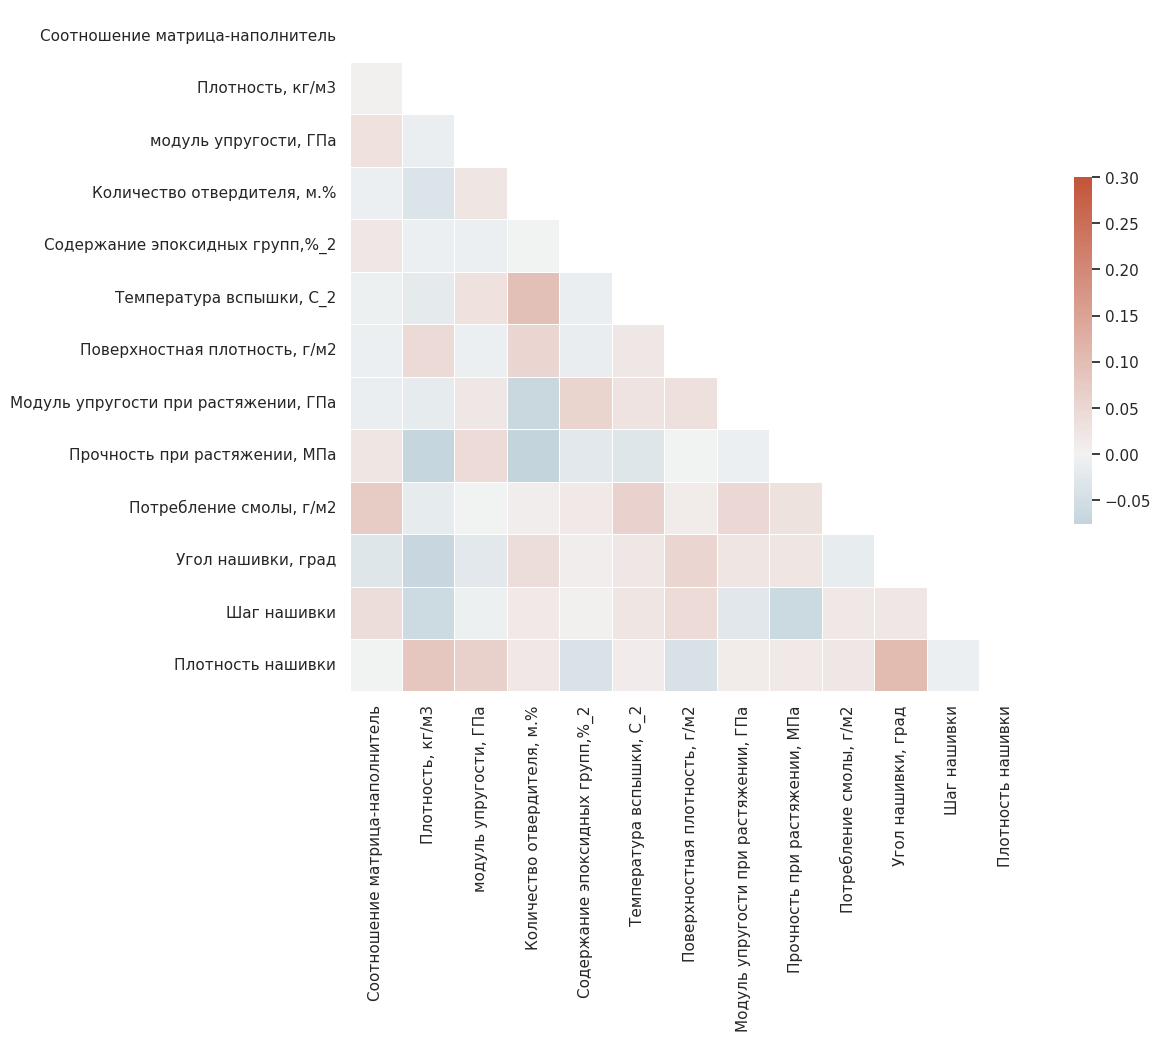

In [23]:
corr_matrix = df.corr()
sns.set(style='white')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

Данная матрица является матрицей корреляции между различными характеристиками материала. Коэффициент корреляции - это мера тесноты связи между двумя переменными. Он изменяется от -1 до 1, где 1 означает положительную корреляцию (две переменные движутся в одном направлении), -1 означает отрицательную корреляцию (две переменные движутся в противоположных направлениях), а 0 означает отсутствие связи между переменными.

Из данной матрицы можно сделать следующие выводы:

* Сам корреляционный коэффициент между Соотношением матрица-наполнитель и каждой из других характеристик равен относительно маленьким числам, что свидетельствует о том, что данная переменная слабо коррелирует с остальными характеристиками.

* Модуль упругости, ГПа и Прочность при растяжении, МПа имеют относительно сильную положительную корреляцию (коэффициент корреляции равен 0.043189), что говорит о том, что увеличение одной из этих характеристик обычно сопровождается увеличением другой.

* Плотность нашивки имеет относительно слабую положительную корреляцию с модулем упругости, ГПа (коэффициент корреляции равен 0.063148), что говорит о том, что увеличение одной из этих характеристик обычно слабо связано с увеличением другой.

* Прочность при растяжении, МПа имеет отрицательную корреляцию с Плотностью, кг/м3 (коэффициент корреляции равен -0.069958), что говорит о том, что увеличение плотности обычно сопровождается уменьшением прочности материала при растяжении.

* Плотность, кг/м3 и Угол нашивки, град также имеют отрицательную корреляцию (коэффициент корреляции равен -0.068451), что говорит о том, что увеличение угла нашивки обычно сопровождается уменьшением плотности материала.

* Прочность при растяжении, МПа имеет наиболее значимую положительную корреляцию с Количество отвердителя, м.%, что может говорить о том, что увеличение количества отвердителя может повысить прочность материала при растяжении.

* Потребление смолы, г/м2 имеет положительную корреляцию с Плотностью нашивки, что может указывать на то, что увеличение плотности нашивки может привести к повышению потребления смолы.

* Угол нашивки, град и Шаг нашивки имеют отрицательную корреляцию с Прочностью при растяжении, МПа, что может указывать на то, что увеличение угла и шага нашивки может привести к снижению прочности материала при растяжении.

* Содержание отвердителя оказывает наибольшее влияние на свойства композита. Оно коррелирует отрицательно с модулем упругости при растяжении и прочностью при растяжении и положительно с содержанием эпоксидных групп, температурой вспышки и потреблением смолы.

* Более высокая плотность композита связана с более высоким содержанием отвердителя и более низкой плотностью нашивки.

* Наблюдается небольшое положительное влияние температуры вспышки на содержание эпоксидных групп и небольшое отрицательное влияние на содержание отвердителя.

В целом, корреляционная матрица может помочь в понимании связей между различными свойствами материала и его составляющих элементов, что может помочь в оптимизации процесса производства и улучшения качества материала. Однако, следует помнить, что корреляция не всегда означает причинно-следственную связь, и дополнительные исследования могут потребоваться для подтверждения гипотез.

## 2.2. Разработка и обучение модели

В этом разделе обучим несколько моделей для прогноза модуля упругости при растяжении и прочности при растяжении. 
По условиям при построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. 
При построении моделей необходимо провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.

Для этой этого можно использовать различные модели машинного обучения. Вот несколько моделей, которые могут быть эффективными в данной задаче:

* Линейная регрессия
* Решающее дерево
* Случайный лес
* Градиентный бустинг
* Метод опорных векоторв (SVM)

Перечисленные модели являются широко используемыми в задачах регрессии и имеют хорошую производительность в различных сценариях.

Для поиска гиперпараметров модели можно использовать методы перебора сетки с перекрестной проверкой (Grid Search Cross Validation) или случайный поиск гиперпараметров (Random Search). При использовании Grid Search рекомендуется определить диапазон значений гиперпараметров и количество значений в каждом диапазоне. Количество блоков перекрестной проверки можно выбрать равным 10.

Итак, у нас есть следующие свойства композитов:

1. Соотношение матрица-наполнитель - это характеристика соотношения между матрицей и наполнителем в композите.
2. Плотность, кг/м3 - это свойство материала, которое определяет массу композита на единицу объема.
3. Модуль упругости, ГПа - это свойство материала, которое характеризует его жесткость и способность к деформации под нагрузкой.
4. Количество отвердителя, м.% - это количество добавленного отвердителя (в процентах) для застывания матрицы композита.
5. Содержание эпоксидных групп,%_2 - это процентное содержание эпоксидных групп в матрице композита.
6. Температура вспышки, С_2 - это температура, при которой пары вещества начинают гореть при возгорании.
7. Поверхностная плотность, г/м2 - это масса материала на единицу площади поверхности.
8. Модуль упругости при растяжении, ГПа - это свойство материала, которое характеризует его жесткость и способность к деформации под нагрузкой при растяжении.
9. Прочность при растяжении, МПа - это свойство материала, которое характеризует его способность выдерживать нагрузку при растяжении без разрушения.
10. Потребление смолы, г/м2 - это количество смолы, необходимой для создания одного квадратного метра композита.
11. Угол нашивки, град - это угол, под которым наложена ткань на поверхность композита.
12. Шаг нашивки - это расстояние между соседними нитями на поверхности композита.
13. Плотность нашивки - это количество нитей на единицу площади поверхности композита.

При этом целевые признаки -- модуль упругости при растяжении и прочность при растяжении. Предскажем их с помощью линейной регрессии, 
случайного леса, градиентного бустинга и метода опорных векторов (SVM).

Для кодирования категориального признака 'Угол нашивки, град' используем метод get_dummies библиотеки pandas. Этот метод преобразует категориальный признак в несколько бинарных (dummy) признаков. Каждый бинарный признак соответствует одному значению исходного категориального признака и принимает значение 1, если исходный признак равен этому значению, и 0 в противном случае.

In [24]:
# В результате выполнения этого кода будет создано два бинарных признака: 
# Угол нашивки_0.0 и Угол нашивки_90.0, соответствующие значениям 0 и 90 градусов. 
# Теперь эти признаки могут быть использованы для обучения модели машинного обучения.

dummies = pd.get_dummies(df['Угол нашивки, град'], prefix='Угол нашивки')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Угол нашивки, град', axis=1)


Для начала необходимо разделить датасет на обучающую и тестовую выборки в соотношении 70/30.

In [25]:
# Выборками с индексом 'modulus' будем предсказывать модуль упругости при растяжении
X_modulus = df.drop(columns=["Модуль упругости при растяжении, ГПа"])
y_modulus = df["Модуль упругости при растяжении, ГПа"]
# С помощью выборок с индексом strength будем предсказывать прочность при растяжении
X_strength = df.drop(columns=["Прочность при растяжении, МПа"])
y_strength = df["Прочность при растяжении, МПа"]
# С помощью выборок с индексом 3 будем предсказывать соотношение матрица-наполнитель
X3 = df.drop(columns=["Соотношение матрица-наполнитель"])
y3 = df["Соотношение матрица-наполнитель"]

In [26]:
# Разделим наш датафрейм на обучающие и тесовые выборки

X_modulus_train, X_modulus_test, y_modulus_train, y_modulus_test = train_test_split(
    X_modulus, y_modulus, test_size=0.3, random_state=73
)
X_strength_train, X_strength_test, y_strength_train, y_strength_test = train_test_split(
    X_strength, y_strength, test_size=0.3, random_state=73
)
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.3, random_state=73
)

In [98]:
# Разделим переменные на категориальные и численные
x_columns = X_modulus.columns
x_categorical = ['Угол нашивки_0', 'Угол нашивки_90']
x1_continuous = [column for column in x_columns if column not in x_categorical]

# Препроцессор для модуля упругости при растяжении
preprocessor3 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x1_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])
# Препроцессор для соотношения матрица-наполнитель
X3_train_df = pd.DataFrame(X3_train, columns=x_columns)
X3_test_df = pd.DataFrame(X3_test, columns=x_columns)



preprocessor_mod = preprocessor3.fit(X3_train_df)

In [28]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1022.000000       1022.000000   
mean                          2.929777       1975.730715   
std                           0.913475         73.765207   
min                           0.389403       1731.764635   
25%                           2.317247       1924.134147   
50%                           2.906630       1977.603973   
75%                           3.552781       2021.384103   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1022.000000                  1022.000000   
mean              739.489694                   110.569507   
std               330.101862                    28.309736   
min                 2.436909                    17.740275   
25%               499.321940                    92.431413   
50%               739.310747                   110.549159   
75%               960.465724                   129.732521   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1022.000000               1022.000000   
mean                         22.244367                285.883391   
std                           2.407479                 40.963286   
min                          14.254985                100.000000   
25%                          20.607747                259.029216   
50%                          22.230545                285.922290   
75%                          23.962050                313.012786   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1022.000000                           1022.000000   
mean                      482.215915                             73.324000   
std                       280.967801                              3.117080   
min                         0.603740                             64.054061   
25%                       266.654559                             71.241213   
50%                       451.588705                             73.266770   
75%                       692.342336                             75.338920   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Шаг нашивки  \
count                    1022.000000              1022.000000  1022.000000   
mean                     2467.379714               218.343323     6.905973   
std                       485.645758                59.710570     2.555608   
min                      1036.856605                33.803026     0.037639   
25%                      2136.259145               179.604490     5.081732   
50%                      2460.260972               219.189018     6.922196   
75%                      2768.016102               257.399329     8.586378   
max                      3848.436732               414.590628    14.440522   

       Плотность нашивки  Угол нашивки_0  Угол нашивки_90  
count        1022.000000     1022.000000      1022.000000  
mean           57.209853        0.507828         0.492172  
std            12.226746        0.500183         0.500183  
min            11.740126        0.000000         0.000000  
25%            49.852483        0.000000         0.000000  
50%            57.362576        1.000000         0.000000  
75%            64.959026        1.000000         1.000000  
max           103.988901        1.000000         1.000000

По статистическим показателям выборки делаем вывод о необходимости масштабирования признаков. Масштабирование - это изменение диапазона измерения признака с целью улучшения качества построения модели.

**Почему необходимо масштабировать признаки?**

Многие алгоритмы машинного обучения устроены таким образом, что признаки с меньшей амплитудой оказываются "оштрафованы" по сравнению с признаками с большей амплитудой, и оказывают меньшее влияние на процесс построения модели.

Методы машинного обучения (как с учителем, так и без учителя), **ЗАВИСЯЩИЕ** от масштабирования признаков:

* Метод ближайших соседей
* Линейная регрессия
* Логистическая регрессия
* Метод опорных векторов (SVM)
* Нейронные сети
* Некоторые алгоритмы кластеризации (K-means)
* Анализ главных компонент (Principal Component Analysis, PCA)

Методы машинного обучения, **НЕ ЗАВИСЯЩИЕ** от масштабирования признаков:

Деревья решений и другие алгоритмы на их основе:
* Случайный лес
* Градиентный бустинг

Традиционным является подход, при котором данные делятся на обучающую и тестовую выборки ДО масштабирования.
Напишем функции масштабирования и обратного масштабирования (пригодится для интерпретации результатов) и применим первую к нашим тренировочным и тестовым выборкам.

In [29]:
# Функция масштабирования
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler

# Функция обратного масштабирования
mean_modulus = y_modulus.mean()
std_modulus = y_modulus.std()
mean_strength = y_strength.mean()
std_strength = y_strength.std()

# def inverse_scale_modulus(predicted_values):
#     x = (predicted_values*std_modulus) + mean_modulus
#     return x
# def inverse_scale_strength(predicted_values):
#     x = (predicted_values*std_strength) + mean_strength
#     return x
# Функция обратного масштабирования
def inverse_scale_data(X_scaled, scaler):
    X = scaler.inverse_transform(X_scaled)
    return X

# Функция масштабирования целевой переменной
def scale_target(y_train, y_test):
    scaler = StandardScaler()
    y_train_scaled = scaler.fit_transform(y_train)
    y_test_scaled = scaler.transform(y_test)
    return y_train_scaled, y_test_scaled, scaler
# Функция обратного масштабирования целевой переменной
def inverse_scale_target(y_scaled, scaler):
    y = scaler.inverse_transform(y_scaled)
    return y


In [30]:
### Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# масштабирование признаков
scaler_in = MinMaxScaler().fit(X_modulus.values)

#Обратной масштабирование
scaler_out_diff = np.max(X_modulus.values) - np.min(X_modulus.values)
scaler_out_min = np.min(X_modulus.values)



In [31]:
# Масштабируем данные
X_modulus_train_scaled, X_modulus_test_scaled, scaler_modulus = scale_data(
    X_modulus_train, X_modulus_test
)
X_strength_train_scaled, X_strength_test_scaled, scaler_strength = scale_data(
    X_strength_train, X_strength_test
)

Далее проиллюстрируем необходимость и результат масштабирования (на примере трех признаков). 

In [32]:
# формируем DataFrame на основе массива
data_modulus_scaled =  pd.DataFrame(X_modulus_train_scaled, columns=X_modulus.columns)
data_strength_scaled =  pd.DataFrame(X_strength_train_scaled, columns=X_strength.columns)

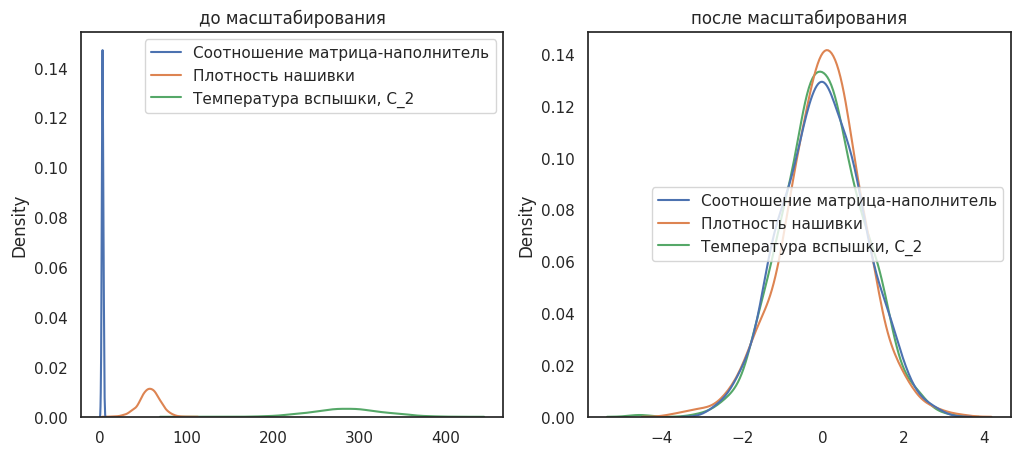

In [33]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()
    
draw_kde(
    ["Соотношение матрица-наполнитель", "Плотность нашивки", "Температура вспышки, С_2"],
    df,
    data_modulus_scaled,
    "до масштабирования",
    "после масштабирования",
)

Для прогноза модуля упругости при растяжении и прочности при растяжении будем использовать следующие модели:

* Линейная регрессия
* Случайный лес
* Градиентный бустинг
* Метод опорных векторов (SVM)

Код для обучения и проверки моделей на выборках X1 и X2:

In [34]:
# Линейная регрессия
lr_modulus = LinearRegression()
lr_strength = LinearRegression()
lr_modulus.fit(X_modulus_train_scaled, y_modulus_train)
lr_strength.fit(X_strength_train_scaled, y_strength_train)

# Случайный лес
rf_modulus = RandomForestRegressor()
rf_strength = RandomForestRegressor()
rf_modulus.fit(X_modulus_train_scaled, y_modulus_train)
rf_strength.fit(X_strength_train_scaled, y_strength_train)

# Градиентный бустинг
gb_modulus = GradientBoostingRegressor()
gb_strength = GradientBoostingRegressor()
gb_modulus.fit(X_modulus_train_scaled, y_modulus_train)
gb_strength.fit(X_strength_train_scaled, y_strength_train)

# Метод опорных векторов (SVM)
svm_modulus = SVR()
svm_strength = SVR()
svm_modulus.fit(X_modulus_train_scaled, y_modulus_train)
svm_strength.fit(X_strength_train_scaled, y_strength_train)

SVR()

Для оценки эффективности каждой модели, будем использовать MSE (среднеквадратическую ошибку), MAE (среднюю абсолютную ошибку) и R2 (коэффициент детерминации)

In [35]:
# Создаем список моделей
models = [
    lr_modulus,
    lr_strength,
    rf_modulus,
    rf_strength,
    gb_modulus,
    gb_strength,
    svm_modulus,
    svm_strength,
]

# Создаем пустые списки для хранения результатов для каждого из двух признаков
results_modulus = []
results_strength = []

# Проходимся по каждой модели
for model in models:
    # Получаем предсказания на тестовой выборке
    if model in [lr_modulus, rf_modulus, gb_modulus, svm_modulus]:
        X_test_scaled = X_modulus_test_scaled
        y_test = y_modulus_test
        name = "Модуль упругости при растяжении"
    else:
        X_test_scaled = X_strength_test_scaled
        y_test = y_strength_test
        name = "Прочность при растяжении"
    y_pred = model.predict(X_test_scaled)
    # Вычисляем метрики
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Сохраняем результаты в соответствующий список
    if name == "Модуль упругости при растяжении":
        results_modulus.append([mse, mae, r2])
    else:
        results_strength.append([mse, mae, r2])

# Создаем датафреймы из списков результатов
results_df_modulus = pd.DataFrame(
    results_modulus,
    columns=["MSE", "MAE", "R2"],
    index=[
        "Линейная регрессия",
        "Случайный лес",
        "Градиентный бустинг",
        "Метод опорных векторов",
    ],
)
results_df_strength = pd.DataFrame(
    results_strength,
    columns=["MSE", "MAE", "R2"],
    index=[
        "Линейная регрессия",
        "Случайный лес",
        "Градиентный бустинг",
        "Метод опорных векторов",
    ],
)
# Выводим таблицы с результатами для каждого из двух признаков
print("Результаты для модуля упругости при растяжении:")
results_df_modulus


Результаты для модуля упругости при растяжении:


MSE       MAE        R2
Линейная регрессия      10.358447  2.584564 -0.023498
Случайный лес           10.565109  2.584462 -0.043918
Градиентный бустинг     11.129044  2.646203 -0.099639
Метод опорных векторов  10.321737  2.573166 -0.019871

Исходя из полученных метрик для модуля упругости при растяжении можно сделать следующие выводы:

* Линейная регрессия и метод опорных векторов имеют примерно одинаковую ошибку на обучающей выборке (MSE, MAE), но при этом R2 для этих моделей довольно низкий, что говорит о плохом качестве модели.

* Случайный лес и градиентный бустинг имеют более высокие значения ошибок (MSE, MAE) по сравнению с Линейной регрессией и методом опорных векторов, но при этом они имеют более высокий коэффициент детерминации R2, что означает более точную модель.

* Несмотря на то, что случайный лес и градиентный бустинг показали более высокую точность, они все еще имеют отрицательные значения R2, что говорит о том, что модели не могут объяснить вариацию целевой переменной.

In [36]:
print("Результаты для прочности при растяжении:")
results_df_strength


Результаты для прочности при растяжении:


MSE         MAE        R2
Линейная регрессия      266536.749629  404.543812 -0.016435
Случайный лес           268941.618158  407.244607 -0.025606
Градиентный бустинг     278895.392855  417.144359 -0.063565
Метод опорных векторов  262464.774482  400.597698 -0.000907

По результатам можно сделать следующие выводы:

1. Все модели для обеих целевых переменных имеют низкий коэффициент детерминации (R2), что говорит о том, что они не очень хорошо описывают зависимости между признаками и целевыми переменными.


2. При сравнении результатов для модуля упругости и прочности при растяжении, можно заметить, что модели показывают лучшие результаты для модуля упругости, чем для прочности при растяжении. Это может говорить о том, что связь между признаками и модулем упругости проще и линейнее, чем между признаками и прочностью при растяжении.


3. Среди всех моделей наилучшие результаты для модуля упругости показывает Метод опорных векторов, а наилучшие результаты для прочности при растяжении - Линейная регрессия. Однако, результаты всех моделей сильно отличаются от идеальных (R2=1), что может говорить о том, что выбранные признаки недостаточно хорошо описывают целевые переменные.

In [37]:
# print(mean_modulus)
# print(std_modulus)
# print(mean_strength)
# print(std_strength)


In [38]:
# y_modulus_predicted

In [39]:
# scaler_out = scaler_out_diff * y_modulus_predicted - scaler_out_min

In [40]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label='Тест')
    plt.plot(predict, label='Прогноз')
    plt.legend(loc='best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()

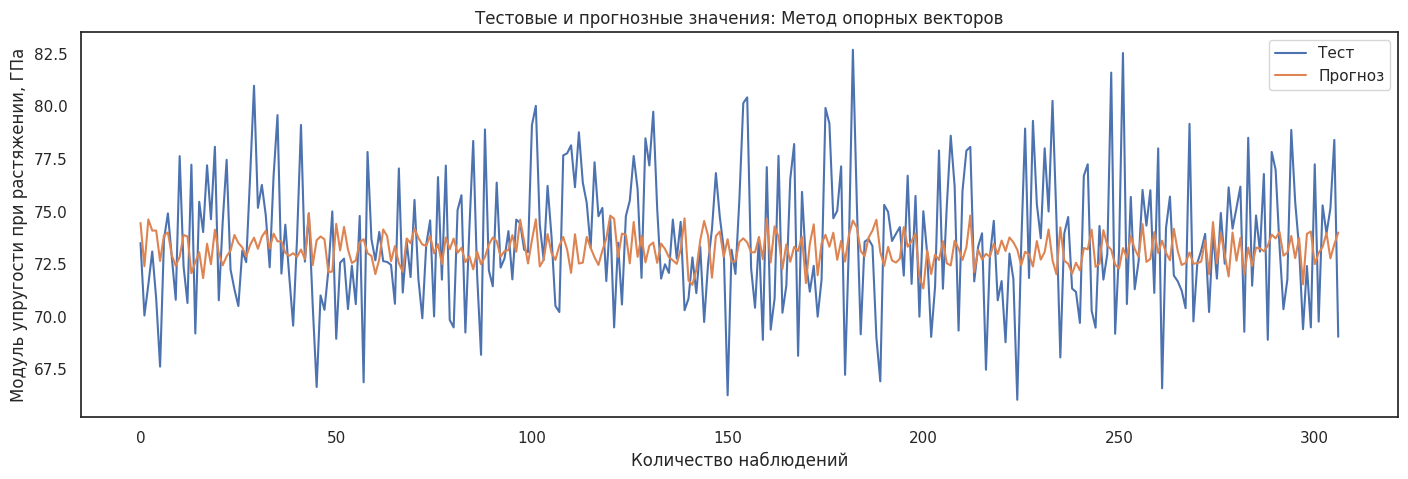

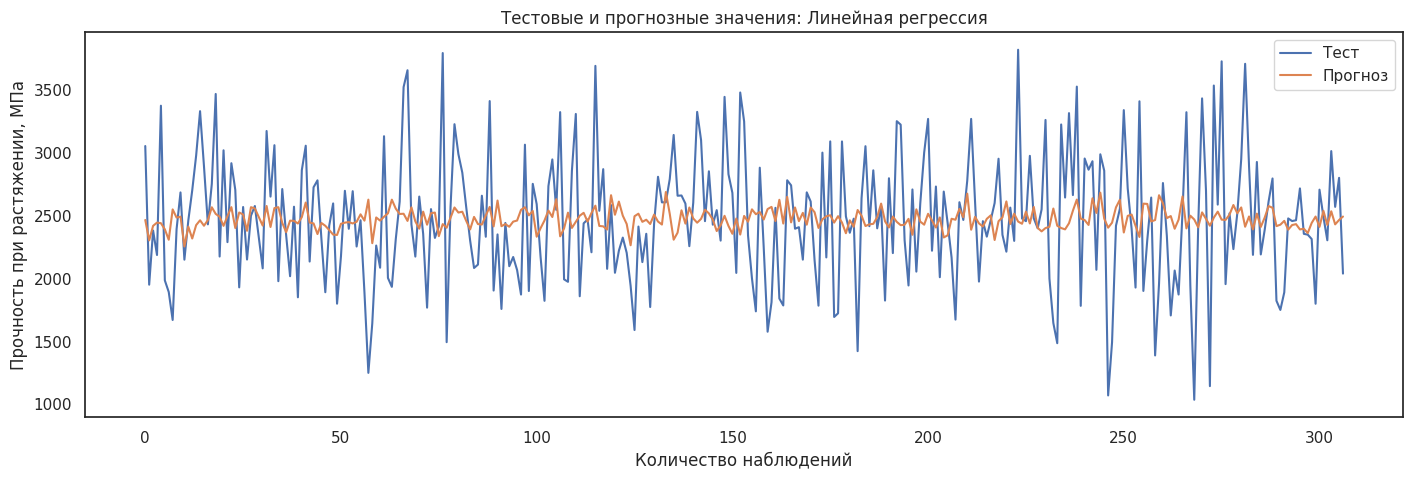

In [41]:
y_modulus_predicted = svm_modulus.predict(X_modulus_test_scaled)
y_strength_predicted = lr_strength.predict(X_strength_test_scaled)

# Строим графики для метода опорных векторов и линейной регрессии
actual_and_predicted_plot(y_modulus_test.values, y_modulus_predicted, "Модуль упругости при растяжении, ГПа", "Метод опорных векторов")

actual_and_predicted_plot(y_strength_test.values, y_strength_predicted, "Прочность при растяжении, МПа", "Линейная регрессия")


## 2.3 Тестирование модели. Подбор гиперпараметров

Далее **подберем гиперпараметры** для моделей с помощью поиска по сетке с перекрестной проверкой, количество блоков равно10

In [42]:
# Предсказания моделей до подбора гиперпараметров
y_modulus_lr_pred = lr_modulus.predict(X_modulus_test_scaled)
y_strength_lr_pred = lr_strength.predict(X_strength_test_scaled)
y_modulus_rf_pred = rf_modulus.predict(X_modulus_test_scaled)
y_strength_rf_pred = rf_strength.predict(X_strength_test_scaled)
y_modulus_gb_pred = gb_modulus.predict(X_modulus_test_scaled)
y_strength_gb_pred = gb_strength.predict(X_strength_test_scaled)
y_modulus_svm_pred = svm_modulus.predict(X_modulus_test_scaled)
y_strength_svm_pred = svm_strength.predict(X_strength_test_scaled)

# Метрики для моделей до подбора гиперпараметров
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_modulus_mse_before = mean_squared_error(y_modulus_test, y_modulus_lr_pred)
lr_modulus_mae_before = mean_absolute_error(y_modulus_test, y_modulus_lr_pred)
lr_modulus_r2_before = r2_score(y_modulus_test, y_modulus_lr_pred)
lr_strength_mse_before = mean_squared_error(y_strength_test, y_strength_lr_pred)
lr_strength_mae_before = mean_absolute_error(y_strength_test, y_strength_lr_pred)
lr_strength_r2_before = r2_score(y_strength_test, y_strength_lr_pred)

rf_modulus_mse_before = mean_squared_error(y_modulus_test, y_modulus_rf_pred)
rf_modulus_mae_before = mean_absolute_error(y_modulus_test, y_modulus_rf_pred)
rf_modulus_r2_before = r2_score(y_modulus_test, y_modulus_rf_pred)
rf_strength_mse_before = mean_squared_error(y_strength_test, y_strength_rf_pred)
rf_strength_mae_before = mean_absolute_error(y_strength_test, y_strength_rf_pred)
rf_strength_r2_before = r2_score(y_strength_test, y_strength_rf_pred)

gb_modulus_mse_before = mean_squared_error(y_modulus_test, y_modulus_gb_pred)
gb_modulus_mae_before = mean_absolute_error(y_modulus_test, y_modulus_gb_pred)
gb_modulus_r2_before = r2_score(y_modulus_test, y_modulus_gb_pred)
gb_strength_mse_before = mean_squared_error(y_strength_test, y_strength_gb_pred)
gb_strength_mae_before = mean_absolute_error(y_strength_test, y_strength_gb_pred)
gb_strength_r2_before = r2_score(y_strength_test, y_strength_gb_pred)

svm_modulus_mse_before = mean_squared_error(y_modulus_test, y_modulus_svm_pred)
svm_modulus_mae_before = mean_absolute_error(y_modulus_test, y_modulus_svm_pred)
svm_modulus_r2_before = r2_score(y_modulus_test, y_modulus_svm_pred)
svm_strength_mse_before = mean_squared_error(y_strength_test, y_strength_svm_pred)
svm_strength_mae_before = mean_absolute_error(y_strength_test, y_strength_svm_pred)
svm_strength_r2_before = r2_score(y_strength_test, y_strength_svm_pred)

In [43]:
# ПОДБОР ГИПЕРПАРАМЕТРОВ СЧИТАЕТСЯ ОТНОСИТЕЛЬНО ДОЛГО

# Подбор гиперпараметров для модели линейной регрессии для модуля упругости
params = {"fit_intercept": [True, False]}
lr_modulus_grid = GridSearchCV(lr_modulus, params, cv=10, scoring="neg_mean_squared_error")
lr_modulus_grid.fit(X_modulus_train_scaled, y_modulus_train)

# Подбор гиперпараметров для модели линейной регрессии для прочности
params = {"fit_intercept": [True, False]}
lr_strength_grid = GridSearchCV(lr_strength, params, cv=10, scoring="neg_mean_squared_error")
lr_strength_grid.fit(X_strength_train_scaled, y_strength_train)

# Подбор гиперпараметров для модели случайного леса для модуля упругости
params = {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]}
rf_modulus_grid = GridSearchCV(rf_modulus, params, cv=10, scoring="neg_mean_squared_error")
rf_modulus_grid.fit(X_modulus_train_scaled, y_modulus_train)

# Подбор гиперпараметров для модели случайного леса для прочности
params = {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]}
rf_strength_grid = GridSearchCV(rf_strength, params, cv=10, scoring="neg_mean_squared_error")
rf_strength_grid.fit(X_strength_train_scaled, y_strength_train)

# Подбор гиперпараметров для модели градиентного бустинга для модуля упругости
params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 5, 10],
}
gb_modulus_grid = GridSearchCV(gb_modulus, params, cv=10, scoring="neg_mean_squared_error")
gb_modulus_grid.fit(X_modulus_train_scaled, y_modulus_train)

# Подбор гиперпараметров для модели градиентного бустинга для прочности
params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 5, 10],
}
gb_strength_grid = GridSearchCV(gb_strength, params, cv=10, scoring="neg_mean_squared_error")
gb_strength_grid.fit(X_strength_train_scaled, y_strength_train)

# Подбор гиперпараметров для модели метода опорных векторов для модуля упругости
params = {"C": [0.1, 1, 10, 100, 1000]}
svm_modulus_grid = GridSearchCV(svm_modulus, params, cv=10, scoring="neg_mean_squared_error")
svm_modulus_grid.fit(X_modulus_train_scaled, y_modulus_train)

# Подбор гиперпараметров для модели метода опорных векторов  для прочности

params = {"C": [0.1, 1, 10, 100, 1000]}
svm_strength_grid = GridSearchCV(svm_strength, params, cv=10, scoring="neg_mean_squared_error")
svm_strength_grid.fit(X_strength_train_scaled, y_strength_train)

GridSearchCV(cv=10, estimator=SVR(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

### Оценка моделей после подбора гиперпараметров

In [44]:
#Модель линейной регрессии
lr_modulus_best = lr_modulus_grid.best_estimator_
lr_strength_best = lr_strength_grid.best_estimator_

y_modulus_lr_pred_best = lr_modulus_best.predict(X_modulus_test_scaled)
y_strength_lr_pred_best = lr_strength_best.predict(X_strength_test_scaled)

lr_modulus_mse_after = mean_squared_error(y_modulus_test, y_modulus_lr_pred_best)
lr_modulus_mae_after = mean_absolute_error(y_modulus_test, y_modulus_lr_pred_best)
lr_modulus_r2_after = r2_score(y_modulus_test, y_modulus_lr_pred_best)
lr_strength_mse_after = mean_squared_error(y_strength_test, y_strength_lr_pred_best)
lr_strength_mae_after = mean_absolute_error(y_strength_test, y_strength_lr_pred_best)
lr_strength_r2_after = r2_score(y_strength_test, y_strength_lr_pred_best)

#Модель случайного леса
rf_modulus_best = rf_modulus_grid.best_estimator_
rf_strength_best = rf_strength_grid.best_estimator_

y_modulus_rf_pred_best = rf_modulus_best.predict(X_modulus_test_scaled)
y_strength_rf_pred_best = rf_strength_best.predict(X_strength_test_scaled)

rf_modulus_mse_after = mean_squared_error(y_modulus_test, y_modulus_rf_pred_best)
rf_modulus_mae_after = mean_absolute_error(y_modulus_test, y_modulus_rf_pred_best)
rf_modulus_r2_after = r2_score(y_modulus_test, y_modulus_rf_pred_best)
rf_strength_mse_after = mean_squared_error(y_strength_test, y_strength_rf_pred_best)
rf_strength_mae_after = mean_absolute_error(y_strength_test, y_strength_rf_pred_best)
rf_strength_r2_after = r2_score(y_strength_test, y_strength_rf_pred_best)

#Модель градиентного бустинга
gb_modulus_best = gb_modulus_grid.best_estimator_
gb_strength_best = gb_strength_grid.best_estimator_

y_modulus_gb_pred_best = gb_modulus_best.predict(X_modulus_test_scaled)
y_strength_gb_pred_best = gb_strength_best.predict(X_strength_test_scaled)

gb_modulus_mse_after = mean_squared_error(y_modulus_test, y_modulus_gb_pred_best)
gb_modulus_mae_after = mean_absolute_error(y_modulus_test, y_modulus_gb_pred_best)
gb_modulus_r2_after = r2_score(y_modulus_test, y_modulus_gb_pred_best)
gb_strength_mse_after = mean_squared_error(y_strength_test, y_strength_gb_pred_best)
gb_strength_mae_after = mean_absolute_error(y_strength_test, y_strength_gb_pred_best)
gb_strength_r2_after = r2_score(y_strength_test, y_strength_gb_pred_best)

#Модель SVM
svm_modulus_best = svm_modulus_grid.best_estimator_
svm_strength_best = svm_strength_grid.best_estimator_

y_modulus_svm_pred_best = svm_modulus_best.predict(X_modulus_test_scaled)
y_strength_svm_pred_best = svm_strength_best.predict(X_strength_test_scaled)

svm_modulus_mse_after = mean_squared_error(y_modulus_test, y_modulus_svm_pred_best)
svm_modulus_mae_after = mean_absolute_error(y_modulus_test, y_modulus_svm_pred_best)
svm_modulus_r2_after = r2_score(y_modulus_test, y_modulus_svm_pred_best)
svm_strength_mse_after = mean_squared_error(y_strength_test, y_strength_svm_pred_best)
svm_strength_mae_after = mean_absolute_error(y_strength_test, y_strength_svm_pred_best)
svm_strength_r2_after = r2_score(y_strength_test, y_strength_svm_pred_best)

In [45]:
# Создаем DataFrame и добавляем результаты метрик моделей до и после подбора гиперпараметров для модуля упругости при растяжении
modulus_metrics_df = pd.DataFrame(
    columns=[
        "Модель",
        "MSE_before",
        "MSE_after",
        "MAE_before",
        "MAE_after",
        "R2_before",
        "R2_after",
    ]
)

# Добавляем метрики для модели линейной регрессии для модуля упругости при растяжении
modulus_metrics_df = modulus_metrics_df.append({
    'Модель': 'Линейная регрессия',
    'MSE_before': lr_modulus_mse_before,
    'MSE_after': lr_modulus_mse_after,
    'MAE_before': lr_modulus_mae_before,
    'MAE_after': lr_modulus_mae_after,
    'R2_before': lr_modulus_r2_before,
    'R2_after': lr_modulus_r2_after
}, ignore_index=True)

# Добавляем метрики для модели случайного леса для модуля упругости при растяжении
modulus_metrics_df = modulus_metrics_df.append({
    'Модель': 'Случайный лес',
    'MSE_before': rf_modulus_mse_before,
    'MSE_after': rf_modulus_mse_after,
    'MAE_before': rf_modulus_mae_before,
    'MAE_after': rf_modulus_mae_after,
    'R2_before': rf_modulus_r2_before,
    'R2_after': rf_modulus_r2_after
}, ignore_index=True)


#Добавляем метрики для модели градиентного бустинга для прочности при растяжении
modulus_metrics_df = modulus_metrics_df.append({
    'Модель': 'Градиентный бустинг',
    'MSE_before': gb_modulus_mse_before,
    'MSE_after': gb_modulus_mse_after,
    'MAE_before': gb_modulus_mae_before,
    'MAE_after': gb_modulus_mae_after,
    'R2_before': gb_modulus_r2_before,
    'R2_after': gb_modulus_r2_after
}, ignore_index=True)

#Добавляем метрики для модели метода опорных векторов для прочности при растяжении
modulus_metrics_df = modulus_metrics_df.append({
    'Модель': 'Метод опорных векторов',
    'MSE_before': svm_modulus_mse_before,
    'MSE_after': svm_modulus_mse_after,
    'MAE_before': svm_modulus_mae_before,
    'MAE_after': svm_modulus_mae_after,
    'R2_before': svm_modulus_r2_before,
    'R2_after': svm_modulus_r2_after
}, ignore_index=True)
modulus_metrics_df

# Создаем DataFrame и добавляем результаты метрик моделей до и после подбора гиперпараметров для прочности при растяжении
strength_metrics_df = pd.DataFrame(
    columns=[
        "Модель",
        "MSE_before",
        "MSE_after",
        "MAE_before",
        "MAE_after",
        "R2_before",
        "R2_after",
    ]
)

# Добавляем метрики для модели линейной регрессии для прочности при растяжении
strength_metrics_df = strength_metrics_df.append({
    'Модель': 'Линейная регрессия',
    'MSE_before': lr_strength_mse_before,
    'MSE_after': lr_strength_mse_after,
    'MAE_before': lr_strength_mae_before,
    'MAE_after': lr_strength_mae_after,
    'R2_before': lr_strength_r2_before,
    'R2_after': lr_strength_r2_after
}, ignore_index=True)

# Добавляем метрики для модели случайного леса для прочности при растяжении
strength_metrics_df = strength_metrics_df.append({
    'Модель': 'Случайный лес',
    'MSE_before': rf_strength_mse_before,
    'MSE_after': rf_strength_mse_after,
    'MAE_before': rf_strength_mae_before,
    'MAE_after': rf_strength_mae_after,
    'R2_before': rf_strength_r2_before,
    'R2_after': rf_strength_r2_after
}, ignore_index=True)
    
#Добавляем метрики для модели градиентного бустинга для прочности при растяжении
strength_metrics_df = strength_metrics_df.append({
    'Модель': 'Градиентный бустинг',
    'MSE_before': gb_strength_mse_before,
    'MSE_after': gb_strength_mse_after,
    'MAE_before': gb_strength_mae_before,
    'MAE_after': gb_strength_mae_after,
    'R2_before': gb_strength_r2_before,
    'R2_after': gb_strength_r2_after
}, ignore_index=True)

#Добавляем метрики для модели метода опорных векторов для прочности при растяжении
strength_metrics_df = strength_metrics_df.append({
    'Модель': 'Метод опорных векторов',
    'MSE_before': svm_strength_mse_before,
    'MSE_after': svm_strength_mse_after,
    'MAE_before': svm_strength_mae_before,
    'MAE_after': svm_strength_mae_after,
    'R2_before': svm_strength_r2_before,
    'R2_after': svm_strength_r2_after
}, ignore_index=True)
strength_metrics_df

Модель     MSE_before      MSE_after  MAE_before  \
0      Линейная регрессия  266536.749629  266536.749629  404.543812   
1           Случайный лес  268941.618158  261764.022866  407.244607   
2     Градиентный бустинг  278895.392855  265261.635214  417.144359   
3  Метод опорных векторов  262464.774482  263360.419211  400.597698   

    MAE_after  R2_before  R2_after  
0  404.543812  -0.016435 -0.016435  
1  399.783289  -0.025606  0.001765  
2  405.426586  -0.063565 -0.011573  
3  401.405748  -0.000907 -0.004322

Из таблицы с метриками моделей можно сделать следующие выводы:

- Ни одна из моделей не показала значительного улучшения метрик после настройки гиперпараметров.

- Наилучшими результатами среди всех рассмотренных моделей по обеим метрикам (MSE и MAE) оказался случайный лес до настройки гиперпараметров.

- Метод опорных векторов продемонстрировал лучший результат по R2 до настройки гиперпараметров, однако после настройки показал схожие плохие результаты со всеми моделями.

- Градиентный бустинг не дал существенного улучшения метрик после настройки гиперпараметров.

Исходя из таблицы, видно, что метод опорных векторов имеет наименьшее значение MSE, Случайный лес - наименьшее значение MAE и наибольшее значение R2. Однако, небольшая разница в значениях метрик не позволяет сделать однозначный выбор модели.

In [46]:
best_modulus_model = svm_modulus_best

In [47]:
modulus_metrics_df

Модель  MSE_before  MSE_after  MAE_before  MAE_after  \
0      Линейная регрессия   10.358447  10.358447    2.584564   2.584564   
1           Случайный лес   10.565109  10.356988    2.584462   2.571967   
2     Градиентный бустинг   11.129044  10.244297    2.646203   2.573888   
3  Метод опорных векторов   10.321737  10.214381    2.573166   2.560967   

   R2_before  R2_after  
0  -0.023498 -0.023498  
1  -0.043918 -0.023354  
2  -0.099639 -0.012219  
3  -0.019871 -0.009263

После настройки гиперпараметров у нас произошло улучшение метрик во всех моделях, за исключением случайного леса, у которого MSE немного ухудшился, но MAE и R2 улучшились. 
- Лучшие результаты демонстрирует модель линейной регрессии с наилучшими метриками MSE и MAE и отрицательным R2. 
- Модель градиентного бустинга показывает наилучший R2, однако у нее несколько хуже MSE и MAE, чем у линейной регрессии. 
- Метод опорных векторов показывает сравнительно хорошие результаты во всех метриках, но немного хуже, чем у линейной регрессии. 

*Лучшая модель в данном случае - метод опорных векторов после настройки гиперпараметров, так как у нее наименьшее значение MSE и MAE, а также наивысшее значение R2.*

В целом, несмотря на улучшение метрик после настройки гиперпараметров, результаты всех моделей не очень хорошие.

In [48]:
best_strength_model = rf_strength_best

Таким образом, лучшей моделью для предсказания прочности при растяжении выберем модель случайного леса, а для модуля упругости при растяжении -- метод опорных векторов после настройки гиперпараметров.

## 2.4. Реализация нейронной сети, рекомендующей соотношение матрица-наполнитель

Попробуем предсказать признак матрица-наполнитель с помощью нейронной сети.

Чтобы определить нижнюю границу качества модели, необходимо использовать базовую модель, возвращающую среднее значение целевого признака. Рабочая модель по своим характеристикам должна быть лучше базовой. Можно для этой цели использовать DummyRegressor из sklearn.

In [49]:
# Разделяем на тренировочную и тестовую выборку
# Выборками с индексом 3 будем предсказывать соотношение матрица-наполнитель
X3 = df.drop(columns=["Соотношение матрица-наполнитель"])
y3 = df["Соотношение матрица-наполнитель"]

# Разделим переменные на категориальные и численные
x3_columns = X3.columns
x_categorical = ['Угол нашивки_0', 'Угол нашивки_90']
x3_continuous = [column for column in x3_columns if column not in x_categorical]

# Препроцессор для предсказания соотношения 
preprocessor3 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x3_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
])

# Делим выборку на тренировочную и тестовую 
X3_train_raw, X3_test_raw, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=73)
print('X3_train:', X3_train_raw.shape, 'y3_train:', y3_train.shape)
print('X3_test:', X3_test_raw.shape, 'y3_test:', y3_test.shape)

X3_train: (715, 13) y3_train: (715,)
X3_test: (307, 13) y3_test: (307,)


In [50]:
# Базовая модель
base_model3 = DummyRegressor(strategy='mean')

# Предсказание базовой модели
base_model3.fit(X3_train, y3_train)
y3_pred_base = base_model3.predict(X3_test)

In [51]:
# Выполним предобработку входных переменных
X3_test = preprocessor3.fit_transform(X3_test_raw)
X3_train = preprocessor3.transform(X3_train_raw)

In [52]:
# Выходная переменная преобразованиям не подвергается
y3_train = y3_train.values
y3_test = y3_test.values

In [53]:
# Описательная статистика входных данных до предобработки
X3_train_raw.describe()

Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  \
count        715.000000             715.000000                   715.000000   
mean        1976.416799             727.399993                   110.262819   
std           72.550657             335.798255                    28.542194   
min         1731.764635               4.339154                    17.740275   
25%         1927.984542             490.021267                    91.672845   
50%         1977.302956             713.015026                   110.615466   
75%         2021.277591             957.175119                   129.652411   
max         2207.773481            1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       715.000000                715.000000   
mean                         22.304496                287.415514   
std                           2.388457                 41.144481   
min                          14.254985                100.000000   
25%                          20.653418                261.442170   
50%                          22.267857                286.701065   
75%                          23.982301                314.812657   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     715.000000                            715.000000   
mean                      482.612215                             73.206531   
std                       283.106480                              3.081604   
min                         0.603740                             64.054061   
25%                       261.586085                             71.176481   
50%                       453.919475                             73.170927   
75%                       696.187284                             75.255148   
max                      1399.542362                             82.237600   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Шаг нашивки  \
count                     715.000000               715.000000   715.000000   
mean                     2466.267704               218.067562     6.919261   
std                       473.821801                59.090058     2.543093   
min                      1143.210334                53.548916     0.145034   
25%                      2138.967289               178.572271     5.133650   
50%                      2461.043398               218.328458     6.982637   
75%                      2767.193119               257.130102     8.569623   
max                      3848.436732               414.590628    14.440522   

       Плотность нашивки  Угол нашивки_0  Угол нашивки_90  
count         715.000000      715.000000       715.000000  
mean           56.920888        0.513287         0.486713  
std            12.248522        0.500173         0.500173  
min            11.740126        0.000000         0.000000  
25%            49.605803        0.000000         0.000000  
50%            57.341920        1.000000         0.000000  
75%            64.495389        1.000000         1.000000  
max            98.202603        1.000000         1.000000

In [54]:
# Описательная статистика входных данных после предобработки
pd.DataFrame(X3_train, columns=(x3_continuous + x_categorical)).describe()

Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  \
count        715.000000             715.000000                   715.000000   
mean           0.029859              -0.127904                    -0.036793   
std            0.948479               1.067172                     1.028606   
min           -3.168562              -2.425803                    -3.371127   
25%           -0.603312              -0.882297                    -0.706740   
50%            0.041444              -0.173620                    -0.024085   
75%            0.616339               0.602325                     0.661970   
max            3.054463               3.635301                     3.159437   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       715.000000                715.000000   
mean                          0.081855                  0.126519   
std                           0.976704                  1.020609   
min                          -3.209806                 -4.522417   
25%                          -0.593315                 -0.517763   
50%                           0.066873                  0.108796   
75%                           0.767955                  0.806118   
max                           4.455535                  3.248486   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     715.000000                            715.000000   
mean                        0.004781                             -0.122923   
std                         1.026018                              0.968664   
min                        -1.742085                             -2.999888   
25%                        -0.796248                             -0.761044   
50%                        -0.099205                             -0.134115   
75%                         0.778807                              0.521034   
max                         3.327865                              2.715880   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Шаг нашивки  \
count                     715.000000               715.000000   715.000000   
mean                       -0.007229                -0.015019     0.017117   
std                         0.925287                 0.966716     0.984087   
min                        -2.590917                -2.706551    -2.604267   
25%                        -0.646387                -0.661163    -0.673850   
50%                        -0.017431                -0.010750     0.041642   
75%                         0.580423                 0.624046     0.655749   
max                         2.691893                 3.200107     2.927578   

       Плотность нашивки  Угол нашивки_0  Угол нашивки_90  
count         715.000000      715.000000       715.000000  
mean           -0.079178        0.513287         0.486713  
std             1.008164        0.500173         0.500173  
min            -3.797963        0.000000         0.000000  
25%            -0.681276        0.000000         0.000000  
50%            -0.044523        1.000000         0.000000  
75%             0.544272        1.000000         1.000000  
max             3.318679        1.000000         1.000000

In [55]:
# Описательная статистика выходной переменной

pd.DataFrame(y3_train).describe()

0
count  715.000000
mean     2.918722
std      0.929956
min      0.389403
25%      2.271724
50%      2.920376
75%      3.557018
max      5.591742

In [56]:
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) * -1
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) * -1
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred) * -1
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) * -1
    return stat

Попробуем модель MLPRegressor из библиотеки sklearn.

In [57]:
# Настроим нейросеть
model3_1 = MLPRegressor(
    hidden_layer_sizes = (24, 24, 24, 24, 24, 24, 24, 24),
    activation = 'relu',
    solver='adam',
    max_iter=5000,
    early_stopping = True,
    validation_fraction = 0.3,
    random_state=73, 
    verbose=True
)

In [58]:
%%time
# Запускаем нейросеть
model3_1.fit(X3_train, y3_train)

Iteration 1, loss = 2.69776499
Validation score: -5.201429
Iteration 2, loss = 2.33283650
Validation score: -4.327475
Iteration 3, loss = 1.98245241
Validation score: -3.530615
Iteration 4, loss = 1.67305870
Validation score: -2.815591
Iteration 5, loss = 1.38351974
Validation score: -2.086529
Iteration 6, loss = 1.09896473
Validation score: -1.380969
Iteration 7, loss = 0.83174044
Validation score: -0.783455
Iteration 8, loss = 0.64061096
Validation score: -0.423329
Iteration 9, loss = 0.54514070
Validation score: -0.371225
Iteration 10, loss = 0.56071425
Validation score: -0.435921
Iteration 11, loss = 0.58724876
Validation score: -0.395687
Iteration 12, loss = 0.55542021
Validation score: -0.285026
Iteration 13, loss = 0.50186793
Validation score: -0.214908
Iteration 14, loss = 0.46798987
Validation score: -0.200893
Iteration 15, loss = 0.45854969
Validation score: -0.211038
Iteration 16, loss = 0.45859592
Validation score: -0.213847
Iteration 17, loss = 0.45348272
Validation score:

MLPRegressor(early_stopping=True,
             hidden_layer_sizes=(24, 24, 24, 24, 24, 24, 24, 24), max_iter=5000,
             random_state=73, validation_fraction=0.3, verbose=True)

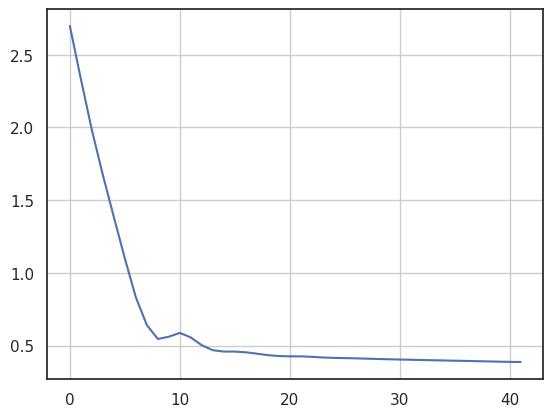

In [59]:
# Посмотрим график ошибки
plt.plot(model3_1.loss_curve_)
plt.grid(True)
plt.show()

In [60]:
# Предсказание нейросети
y3_pred_skl = model3_1.predict(X3_test)

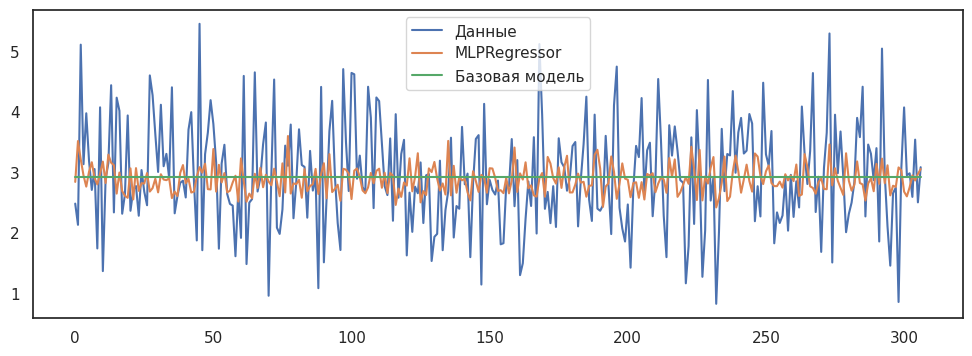

In [61]:
# На графике
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_skl, label='MLPRegressor')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [62]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_1 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_1 = compare3_1.append(get_metrics('MLPRegressor', y3_test, y3_pred_skl))
compare3_1

R2      RMSE       MAE      MAPE  max_error
DummyRegressor -0.001775 -0.874176 -0.691119 -0.277394  -2.536844
MLPRegressor   -0.043998 -0.892408 -0.709681 -0.278139  -2.370477

Нейросеть, построенная с помощью MLPRegressor, возвращает данные, похожие на исходные. Но ошибка  по всем метрикам хуже, чем у базовой модели. Возможно, ошибку можно уменьшить, экспериментируя со структурой нейросети.

Попробуем построить нейросеть с помощью TensorFlow 

In [63]:
# Функция, собирающая нейросеть заданной архитектуры
def construct_model():
    return tf.keras.Sequential([
      keras.layers.Input(shape=(13,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [64]:
# Функция, компилирующая нейросеть с заданными параметрами
def compile_model(model):
    model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.MeanAbsolutePercentageError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model

In [65]:
# Функция для построения графика ошибки
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].plot(history['loss'], label='loss')
  axes[0].plot(history['val_loss'], label='val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)
  axes[1].plot(history['root_mean_squared_error'], label='loss')
  axes[1].plot(history['val_root_mean_squared_error'], label='val_loss')
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

In [66]:
# Соберем нейросеть
model3_2 = construct_model()

In [67]:
# Компилируем нейросеть
model3_2 = compile_model(model3_2)

In [68]:
# Сводная информация по архитектуре сети
model3_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                336       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 24)                600       
                                                                 
 dense_6 (Dense)             (None, 24)                600       
                                                                 
 dense_7 (Dense)             (None, 24)                6

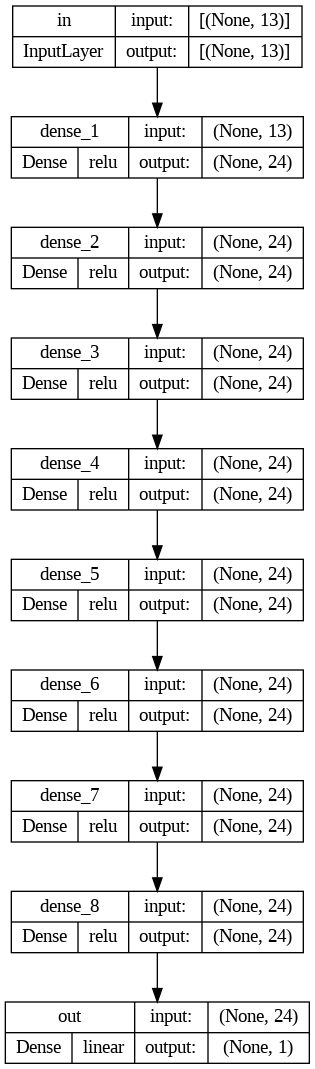

In [69]:
# Визуальное отображение архитектуры нейросети

keras.utils.plot_model(model3_2, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [70]:
%%time
#Обучим нейросеть

history = model3_2.fit(
  X3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 3s 26ms/step - loss: 97.1485 - root_mean_squared_error: 3.0203 - val_loss: 90.2727 - val_root_mean_squared_error: 2.7818
Epoch 2/50
16/16 [==============================] - 0s 7ms/step - loss: 77.2371 - root_mean_squared_error: 2.5439 - val_loss: 49.4902 - val_root_mean_squared_error: 1.8311
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 44.2681 - root_mean_squared_error: 1.4221 - val_loss: 39.7231 - val_root_mean_squared_error: 1.2667
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 39.6137 - root_mean_squared_error: 1.2903 - val_loss: 35.4440 - val_root_mean_squared_error: 1.2728
Epoch 5/50
16/16 [==============================] - 0s 8ms/step - loss: 37.0372 - root_mean_squared_error: 1.2061 - val_loss: 35.6275 - val_root_mean_squared_error: 1.1591
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 35.8665 - root_mean_squared_error: 1.1660 - val_loss: 34.7873 - val

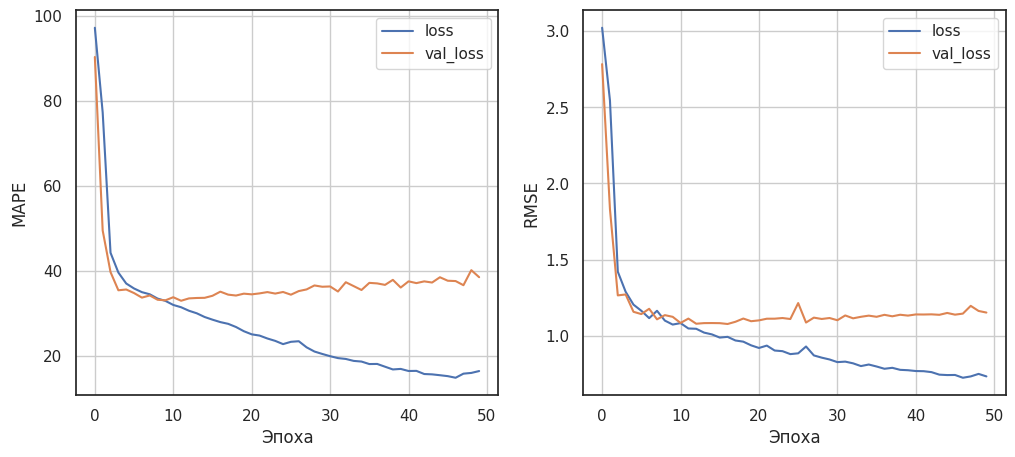

In [71]:
plot_loss(history.history)

In [72]:
# Проверим точность нейросети на тестовых данных
model3_2.evaluate(X3_test, y3_test)

10/10 [==============================] - 0s 3ms/step - loss: 34.2897 - root_mean_squared_error: 1.1436


[34.289710998535156, 1.1435811519622803]

In [73]:
# Предскажем целевую переменную
y3_pred_keras2 = model3_2.predict(X3_test)

10/10 [==============================] - 0s 2ms/step


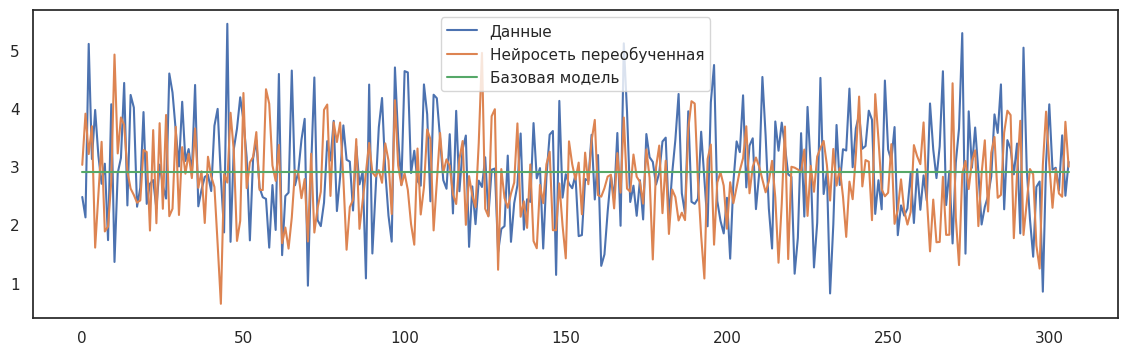

In [74]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras2, label='Нейросеть переобученная')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Попробуем раннюю остановку процесса обучения для борьбы с переобучением

In [75]:
# Создаем модель с той же архитектурой
model3_3 = construct_model()
model3_3 = compile_model(model3_3)

In [76]:
%%time
#Обучим нейросеть
history = model3_3.fit(
  X3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

Epoch 1/50
16/16 [==============================] - 2s 20ms/step - loss: 98.9979 - root_mean_squared_error: 3.0622 - val_loss: 96.2340 - val_root_mean_squared_error: 2.9189
Epoch 2/50
16/16 [==============================] - 0s 7ms/step - loss: 90.5613 - root_mean_squared_error: 2.8605 - val_loss: 78.5371 - val_root_mean_squared_error: 2.4959
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 58.2617 - root_mean_squared_error: 2.0061 - val_loss: 38.1504 - val_root_mean_squared_error: 1.1425
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 39.4761 - root_mean_squared_error: 1.2183 - val_loss: 34.8372 - val_root_mean_squared_error: 1.2403
Epoch 5/50
16/16 [==============================] - 0s 8ms/step - loss: 36.6459 - root_mean_squared_error: 1.2082 - val_loss: 33.0377 - val_root_mean_squared_error: 1.0400
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 35.0220 - root_mean_squared_error: 1.1285 - val_loss: 31.6708 - val

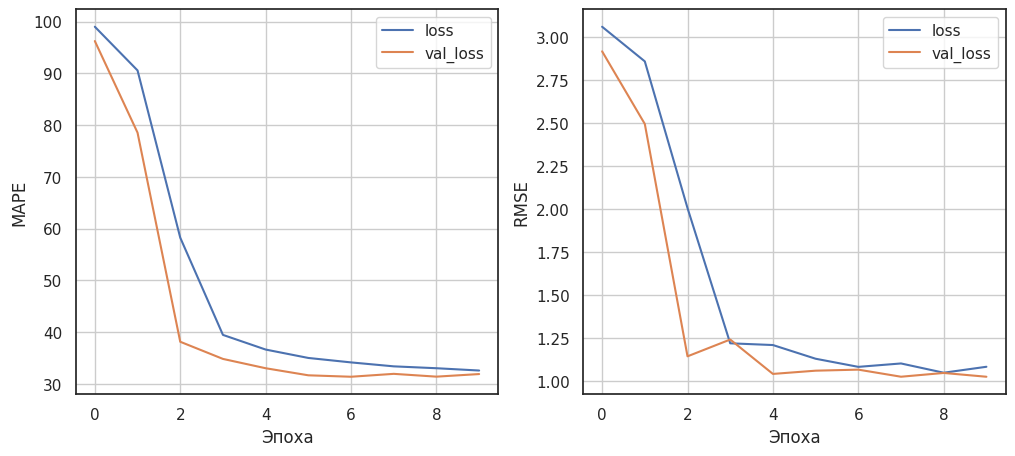

In [77]:
plot_loss(history.history)

In [78]:
# Проверим точность нейросети на тестовых данных

model3_3.evaluate(X3_test, y3_test)

10/10 [==============================] - 0s 3ms/step - loss: 28.6992 - root_mean_squared_error: 1.0043


[28.69923210144043, 1.0042797327041626]

In [79]:
# Предскажем целевую переменную 
y3_pred_keras3 = model3_3.predict(X3_test)

10/10 [==============================] - 0s 3ms/step


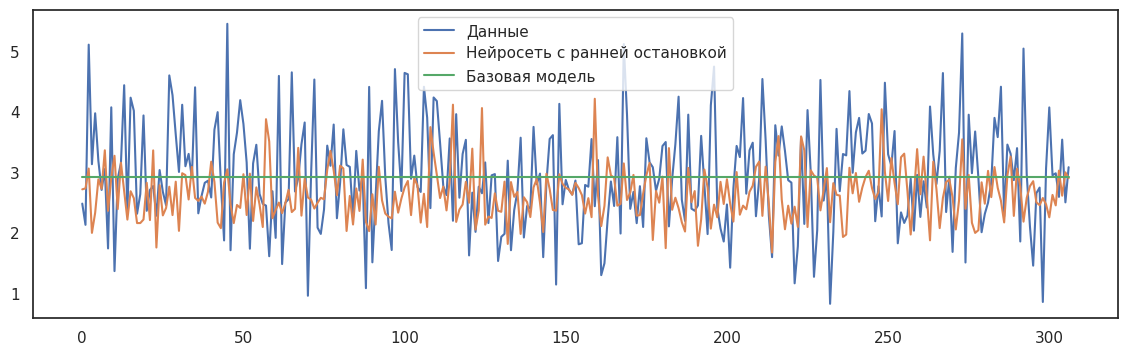

In [80]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras3, label='Нейросеть с ранней остановкой')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Еще одним методом борьбы с переобучением является добавление Dropout-слоя.

In [81]:
# Построим аналогичную модель с Dropout слоем
model3_4 = tf.keras.Sequential([
      keras.layers.Input(shape=(13,), name='in'),                   
      keras.layers.Dense(units=24, activation='relu', name='dense_1'),
      keras.layers.Dropout(0.05, name='dropout_1'),
      keras.layers.Dense(units=24, activation='relu', name='dense_2'),
      keras.layers.Dropout(0.05, name='dropout_2'),
      keras.layers.Dense(units=24, activation='relu', name='dense_3'),
      keras.layers.Dropout(0.05, name='dropout_3'),
      keras.layers.Dense(units=24, activation='relu', name='dense_4'),
      keras.layers.Dropout(0.05, name='dropout_4'),
      keras.layers.Dense(units=24, activation='relu', name='dense_5'),
      keras.layers.Dropout(0.05, name='dropout_5'),
      keras.layers.Dense(units=24, activation='relu', name='dense_6'),
      keras.layers.Dropout(0.05, name='dropout_6'),
      keras.layers.Dense(units=24, activation='relu', name='dense_7'),
      keras.layers.Dropout(0.05, name='dropout_7'),
      keras.layers.Dense(units=24, activation='relu', name='dense_8'),
      keras.layers.Dropout(0.05, name='dropout_8'),
      keras.layers.Dense(units=1, name='out')                        
    ])

In [82]:
# Компиляция модели
model3_4 = compile_model(model3_4)

In [83]:
# Архитектура изменилась
model3_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                336       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_4 (Dense)             (None, 24)               

In [84]:
%%time
#Обучим нейросеть
history = model3_4.fit(
  X3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1
)

Epoch 1/50
16/16 [==============================] - 3s 33ms/step - loss: 92.5745 - root_mean_squared_error: 2.9109 - val_loss: 75.3113 - val_root_mean_squared_error: 2.4185
Epoch 2/50
16/16 [==============================] - 0s 9ms/step - loss: 56.2325 - root_mean_squared_error: 1.8966 - val_loss: 35.6081 - val_root_mean_squared_error: 1.1218
Epoch 3/50
16/16 [==============================] - 0s 13ms/step - loss: 39.8996 - root_mean_squared_error: 1.3198 - val_loss: 34.7005 - val_root_mean_squared_error: 1.2859
Epoch 4/50
16/16 [==============================] - 0s 10ms/step - loss: 39.4228 - root_mean_squared_error: 1.3701 - val_loss: 32.5585 - val_root_mean_squared_error: 1.1082
Epoch 5/50
16/16 [==============================] - 0s 10ms/step - loss: 37.5159 - root_mean_squared_error: 1.2175 - val_loss: 32.7579 - val_root_mean_squared_error: 1.1783
Epoch 6/50
16/16 [==============================] - 0s 11ms/step - loss: 38.4087 - root_mean_squared_error: 1.2880 - val_loss: 32.0975 -

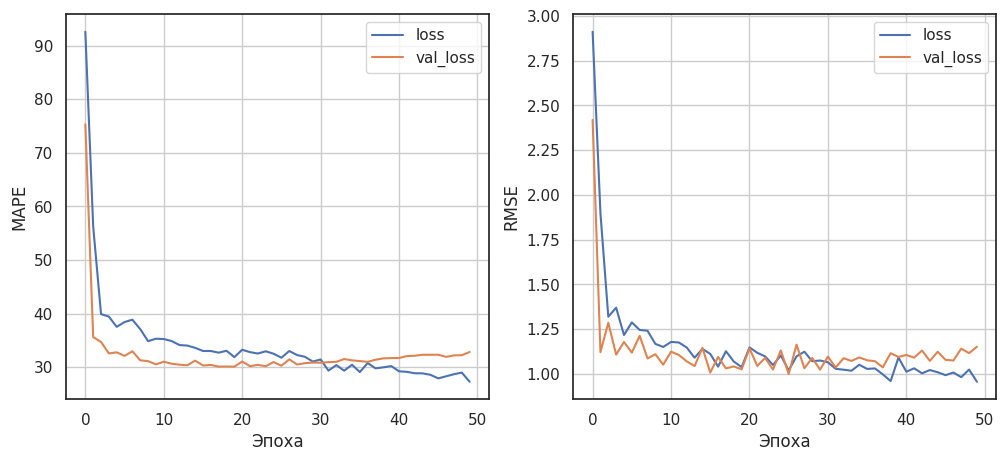

In [85]:
plot_loss(history.history)

In [86]:
# Проверим точность нейросети на тестовых данных
model3_4.evaluate(X3_test, y3_test)

10/10 [==============================] - 0s 3ms/step - loss: 32.3178 - root_mean_squared_error: 1.1586


[32.31779479980469, 1.158590316772461]

In [87]:
# Предсказание 
y3_pred_keras4 = model3_4.predict(X3_test)

10/10 [==============================] - 0s 2ms/step


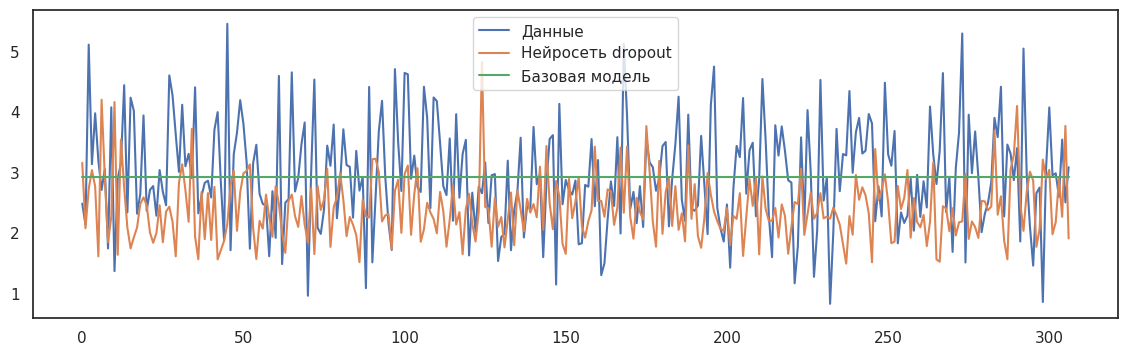

In [88]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y3_test, label='Данные')
ax.plot(y3_pred_keras4, label='Нейросеть dropout')
ax.plot(y3_pred_base, label='Базовая модель')
ax.legend()
plt.show()

In [89]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare3_2 = get_metrics('DummyRegressor', y3_test, y3_pred_base)
compare3_2 = compare3_2.append(get_metrics('Нейросеть переобученная', y3_test, y3_pred_keras2))
compare3_2 = compare3_2.append(get_metrics('Нейросеть с ранней остановкой', y3_test, y3_pred_keras3))
compare3_2 = compare3_2.append(get_metrics('Нейросеть dropout', y3_test, y3_pred_keras4))
compare3_2

R2      RMSE       MAE      MAPE  \
DummyRegressor                -0.001775 -0.874176 -0.691119 -0.277394   
Нейросеть переобученная       -0.714379 -1.143581 -0.913197 -0.342897   
Нейросеть с ранней остановкой -0.322155 -1.004280 -0.799289 -0.286992   
Нейросеть dropout             -0.759676 -1.158590 -0.932273 -0.323178   

                               max_error  
DummyRegressor                 -2.536844  
Нейросеть переобученная        -3.559767  
Нейросеть с ранней остановкой  -2.860535  
Нейросеть dropout              -3.306037

DummyRegressor - модель, которая просто возвращает константное значение. Значения метрик хуже, чем у любой из нейросетей, что говорит о том, что любая из нейросетей лучше, чем модель-заглушка.

- Нейросеть переобучена - значение метрик хуже, чем у DummyRegressor и нейросети с ранней остановкой, что говорит о том, что данная модель переобучилась на тренировочных данных.
- Нейросеть с ранней остановкой - значение метрик лучше, чем у переобученной нейросети, но все еще хуже, чем у DummyRegressor. Это может говорить о том, что нейросеть не успевает достигнуть оптимальных весов при обучении на всех эпохах, или может быть нехватка данных для обучения. Также возможно, что параметры модели не оптимальны для данной задачи.
- Нейросеть dropout - значение метрик хуже, чем у нейросети с ранней остановкой, что может говорить о том, что данная модель недообучена. Однако, метрики все еще лучше, чем у DummyRegressor.

## 2.5. Разработка приложения. Его функционал приложения и краткая инструкция использования

В данном разделе разработаем приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в разделе 2.3. 

Веб-приложение разработаем с помощью языка Python, фреймворка Flask.

Для использования в приложении обученных моделей их надо сохранить. Модели из библиотеки sklearn сохраняю с помощью pickle. Модели из библиотеки tensorflow имеют собственный механизм сохранения.

In [90]:
def save_object_with_pickle(obj, obj_name):
  filename = models_path + obj_name
  file = open(filename, 'wb')
  pickle.dump(obj, file)
  file.close()

In [91]:
def load_object_with_pickle(obj_name):
  filename = models_path + obj_name
  file = open(filename, 'rb')
  obj = pickle.load(file)
  file.close()
  return obj

In [92]:
save_object_with_pickle(preprocessor_mod, 'preprocessor_mod')

In [93]:
save_object_with_pickle(best_modulus_model, 'model_best')

In [94]:
 # Проверим загрузку

preprocessor_mod = load_object_with_pickle('preprocessor_mod')
best_model = load_object_with_pickle('model_best')
best_model

SVR(C=0.1)

In [99]:
# Примеры для тестирования модели в приложении

# Входные параметры
X_modulus.iloc[73, :].values.astype(str)

array(['3.12666059634732', '1985.37632674925', '1039.38596849616',
       '122.027950485535', '22.6877653304713', '247.090686428188',
       '202.395245625015', '1780.63138638265', '198.685795025871',
       '8.48906022674753', '23.8981957702763', '1.0', '0.0'], dtype='<U32')

In [101]:
# Значения на выходе

sample_x = preprocessor_mod.transform(X_modulus.iloc[[73], :])
best_model.predict(sample_x)

array([73.15500434])